In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve, learning_curve, cross_validate, cross_val_score, LearningCurveDisplay
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

_random_state = 0

# Preprocessing

In [2]:
beans = pd.read_excel('data/Dry_Bean_Dataset.xlsx', engine='openpyxl')

In [3]:
beans.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [4]:
beans['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

<AxesSubplot: xlabel='Area', ylabel='Count'>

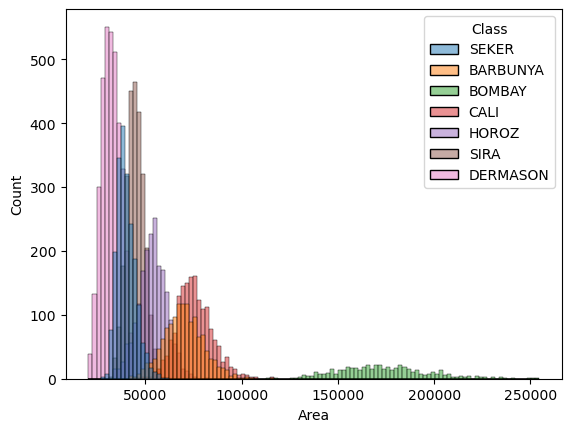

In [5]:
sns.histplot(data=beans, x="Area", hue="Class")

<AxesSubplot: xlabel='Perimeter', ylabel='Count'>

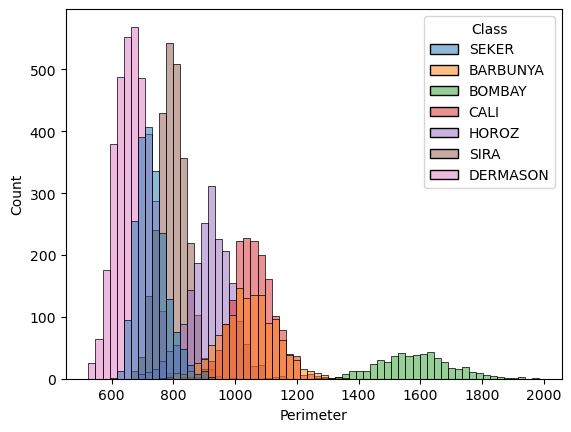

In [6]:
sns.histplot(data=beans, x="Perimeter", hue="Class")

<AxesSubplot: xlabel='MajorAxisLength', ylabel='Count'>

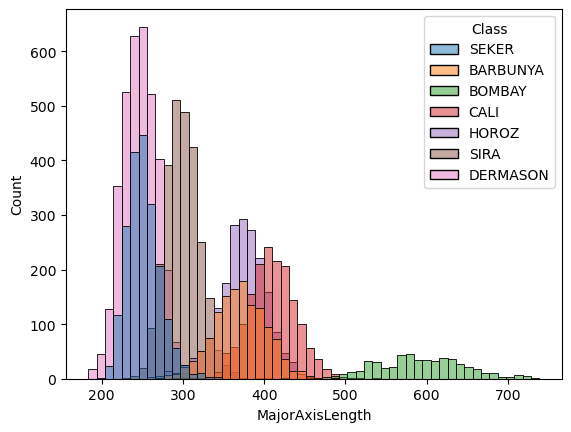

In [7]:
sns.histplot(data=beans, x="MajorAxisLength", hue="Class")

<AxesSubplot: xlabel='MinorAxisLength', ylabel='Count'>

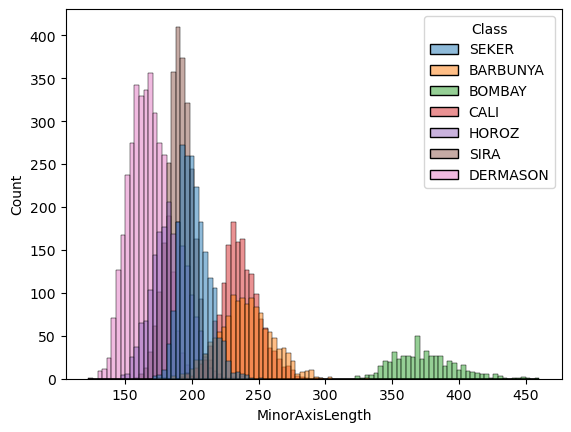

In [8]:
sns.histplot(data=beans, x="MinorAxisLength", hue="Class")

<AxesSubplot: xlabel='AspectRation', ylabel='Count'>

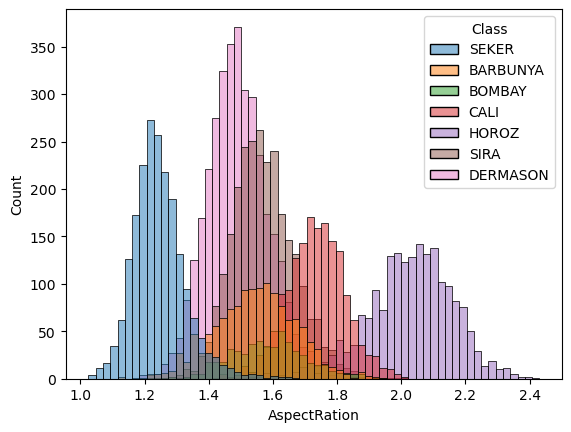

In [9]:
sns.histplot(data=beans, x="AspectRation", hue="Class")

<AxesSubplot: xlabel='Eccentricity', ylabel='Count'>

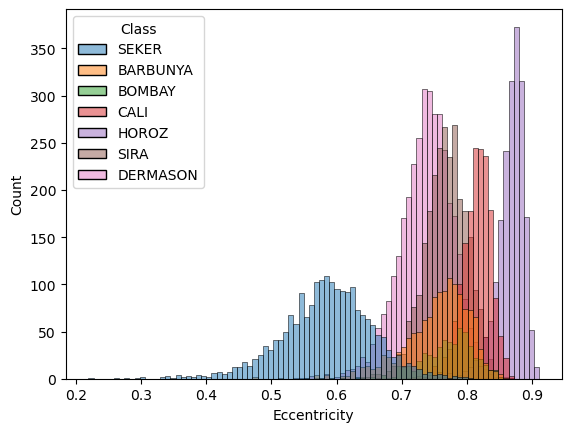

In [10]:
sns.histplot(data=beans, x="Eccentricity", hue="Class")

<AxesSubplot: xlabel='ConvexArea', ylabel='Count'>

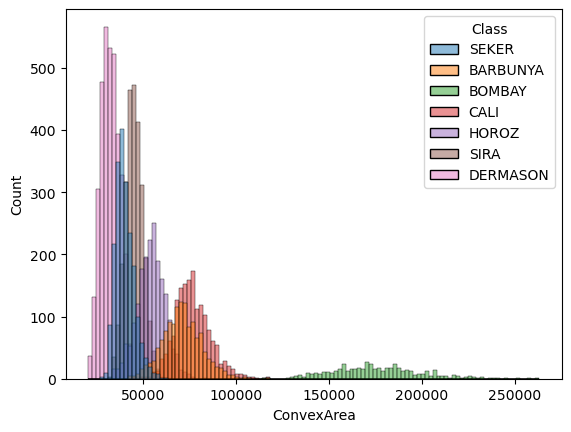

In [11]:
sns.histplot(data=beans, x="ConvexArea", hue="Class")

<AxesSubplot: xlabel='EquivDiameter', ylabel='Count'>

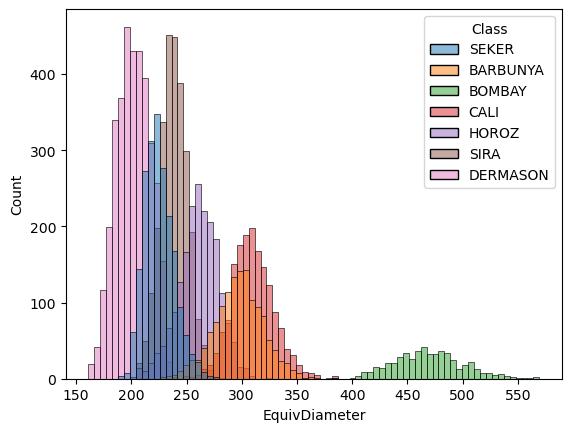

In [12]:
sns.histplot(data=beans, x="EquivDiameter", hue="Class")

<AxesSubplot: xlabel='Extent', ylabel='Count'>

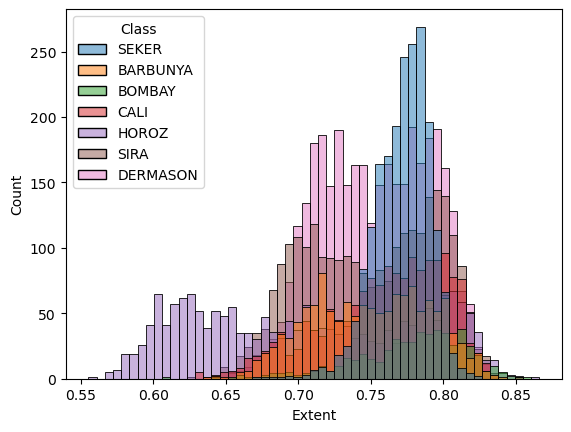

In [13]:
# not normal

sns.histplot(data=beans, x="Extent", hue="Class")

<AxesSubplot: xlabel='Solidity', ylabel='Count'>

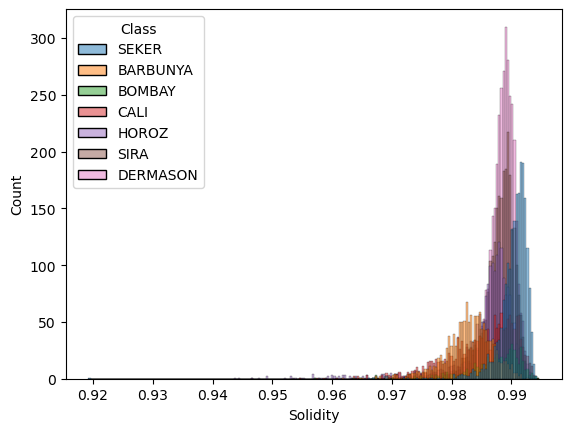

In [14]:
sns.histplot(data=beans, x="Solidity", hue="Class")

<AxesSubplot: xlabel='roundness', ylabel='Count'>

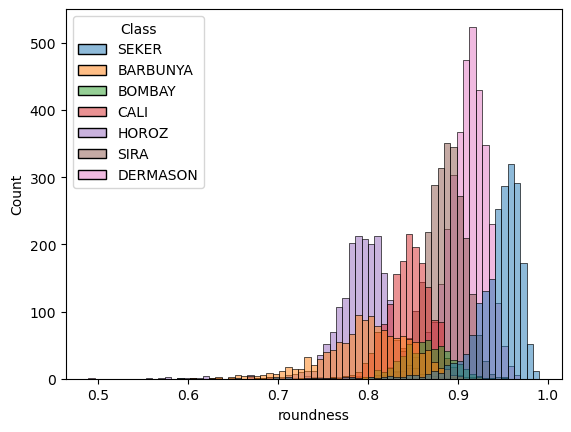

In [15]:
sns.histplot(data=beans, x="roundness", hue="Class")

<AxesSubplot: xlabel='Compactness', ylabel='Count'>

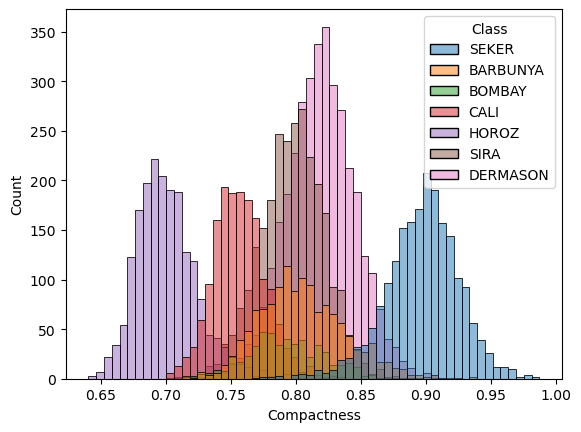

In [16]:
sns.histplot(data=beans, x="Compactness", hue="Class")

<AxesSubplot: xlabel='ShapeFactor1', ylabel='Count'>

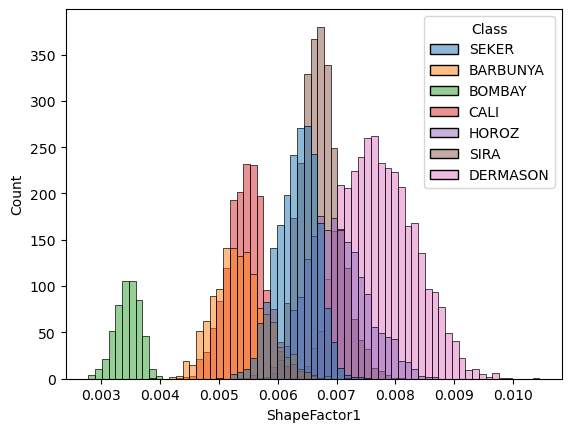

In [17]:
sns.histplot(data=beans, x="ShapeFactor1", hue="Class")

<AxesSubplot: xlabel='ShapeFactor2', ylabel='Count'>

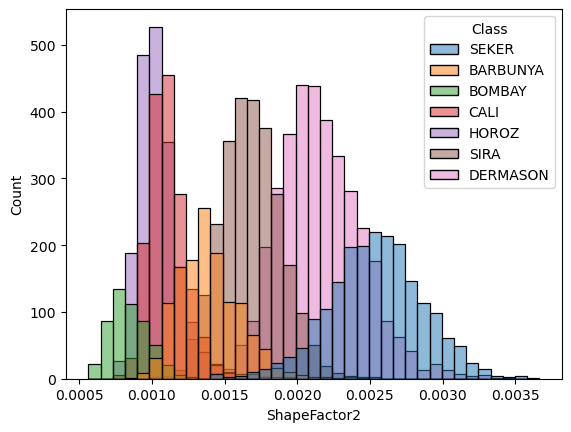

In [18]:
sns.histplot(data=beans, x="ShapeFactor2", hue="Class")

<AxesSubplot: xlabel='ShapeFactor3', ylabel='Count'>

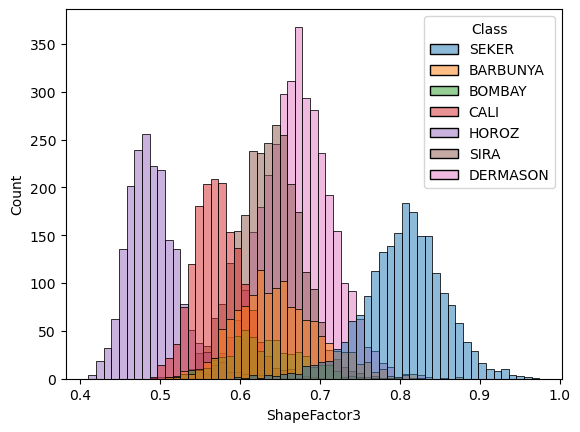

In [19]:
sns.histplot(data=beans, x="ShapeFactor3", hue="Class")

<AxesSubplot: xlabel='ShapeFactor4', ylabel='Count'>

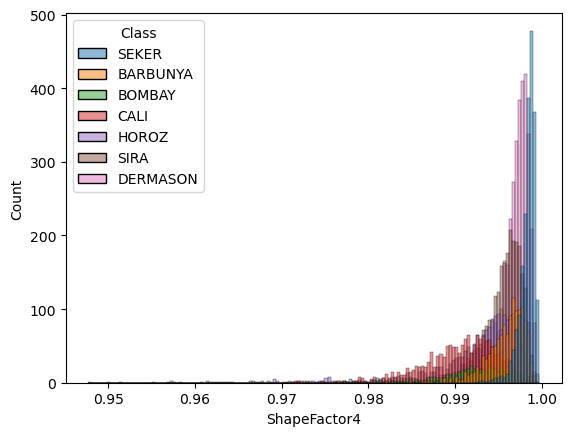

In [20]:
sns.histplot(data=beans, x="ShapeFactor4", hue="Class")

In [5]:
le = LabelEncoder()

In [6]:
le.fit(beans['Class'])
le.classes_

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

In [7]:
le.transform(beans['Class'])

array([5, 5, 5, ..., 3, 3, 3])

In [8]:
beans['Class'] = le.fit_transform(beans['Class'])

In [9]:
beans = beans.groupby('Class', group_keys=False).apply(lambda x: x.sample(500))

In [10]:
beans.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
2226  59508    928.142       343.741918       222.095662      1.547720   
2146  56430    946.460       330.943285       217.743578      1.519876   
2866  72788   1060.865       393.277333       236.877472      1.660256   
2264  60621    934.490       324.545204       239.376276      1.355795   
2430  64595   1013.236       374.375795       220.291828      1.699454   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
2226      0.763243       60177     275.259766  0.783784  0.988883   0.868073   
2146      0.753063       57314     268.046465  0.716571  0.984576   0.791617   
2866      0.798257       73784     304.428251  0.696256  0.986501   0.812736   
2264      0.675266       61608     277.821983  0.733591  0.983979   0.872336   
2430      0.808552       65684     286.783731  0.680929  0.983421   0.790656   

      Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
2226     0.800775      0.005776      0.001465      0.641240      0.992460   
2146     0.809947      0.005865      0.001557      0.656014      0.997060   
2866     0.774080      0.005403      0.001197      0.599200      0.994826   
2264     0.856035      0.005354      0.001773      0.732796      0.993521   
2430     0.766032      0.005796      0.001231      0.586805      0.997247   

      Class  
2226      0  
2146      0  
2866      0  
2264      0  
2430      0

In [11]:
beans_x = beans.loc[:, beans.columns != 'Class']
beans_y = beans['Class']

In [12]:
beans_y

2226    0
2146    0
2866    0
2264    0
2430    0
       ..
7912    6
8622    6
8600    6
9114    6
8924    6
Name: Class, Length: 3500, dtype: int32

In [13]:
scaler = StandardScaler() 
beans_scaled = scaler.fit_transform(beans_x)

beans_x = pd.DataFrame(beans_scaled, index=beans_x.index, columns=beans_x.columns)


In [14]:
beans_x.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
2226 -0.224996  -0.145070        -0.168797        -0.084219     -0.207627   
2146 -0.291833  -0.083197        -0.280409        -0.149460     -0.321655   
2866  0.063369   0.303234         0.263181         0.137371      0.253237   
2264 -0.200828  -0.123628        -0.336204         0.174830     -0.993609   
2430 -0.114536   0.142356         0.098349        -0.111260      0.413761   

      Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
2226      0.073591   -0.228352      -0.125478  0.633335  0.447523   0.080039   
2146     -0.037932   -0.289641      -0.210413 -0.708889 -0.422761  -1.206698   
2866      0.457182    0.062938       0.217973 -1.114584 -0.033766  -0.851280   
2264     -0.890221   -0.197718      -0.095309 -0.369016 -0.543372   0.151775   
2430      0.569967   -0.110461       0.010213 -1.420657 -0.656282  -1.222881   

      Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
2226     0.083959     -0.169314     -0.120286      0.045324     -0.402485  
2146     0.233602     -0.104840      0.029438      0.195514      0.583365  
2866    -0.351545     -0.442011     -0.558567     -0.382042      0.104675  
2264     0.985506     -0.478075      0.382846      0.976063     -0.175117  
2430    -0.482854     -0.155187     -0.502396     -0.508055      0.623532

In [15]:
beans_y.dtypes

dtype('int32')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(beans_x, beans_y, test_size = 0.2, random_state=_random_state)

In [17]:
X_train.shape

(2800, 16)

# Helper Functions

In [19]:
def get_validation_curve(classifier, X, y, param, range_lower, range_upper, step, _scoring):
   param_range = np.arange(range_lower, range_upper, step)

   train_scores, valid_scores = validation_curve(
                                 classifier,
                                 X,
                                 y,
                                 param_name=param,
                                 param_range=param_range,
                                 cv=5,
                                 scoring=_scoring)

   # Calculating mean and standard deviation of training score
   mean_train_score = np.mean(train_scores, axis = 1)
   std_train_score = np.std(train_scores, axis = 1)

   # Calculating mean and standard deviation of testing score
   mean_valid_score = np.mean(valid_scores, axis = 1)
   std_valid_score = np.std(valid_scores, axis = 1)

   # Plot mean accuracy scores for training and testing scores
   fig = plt.figure()
   plt.plot(param_range, mean_train_score,
      label = "Training Score", color = 'b')
   plt.plot(param_range, mean_valid_score,
      label = "Cross Validation Score", color = 'g')

   # Creating the plot
   plt.title(f"Validation Curve with {classifier.__class__.__name__}")
   plt.xlabel(param)
   plt.ylabel(_scoring)
   plt.tight_layout()
   plt.legend(loc = 'best')
   return fig, mean_train_score, mean_valid_score

def cross_validation(model, _X, _y, _cv=5):
   '''Function to perform 5 Folds Cross-Validation
      Parameters
      ----------
   model: Python Class, default=None
            This is the machine learning algorithm to be used for training.
   _X: array
         This is the matrix of features.
   _y: array
         This is the target variable.
   _cv: int, default=5
         Determines the number of folds for cross-validation.
      Returns
      -------
      The function returns a dictionary containing the metrics 'accuracy', 'precision',
      'recall', 'f1' for both training set and validation set.
   '''
   # _scoring = ['accuracy', 'precision', 'recall', 'f1']
   _scoring = 'f1_micro'
   results = cross_validate(estimator=model,
                              X=_X,
                              y=_y,
                              cv=_cv,
                              scoring=_scoring,
                              return_train_score=True)
      
   return results

def plot_cv_result_avg(x_label, y_label, plot_title, train_data, val_data):
   '''Function to plot a grouped bar chart showing the training and validation
      results of the ML model in each fold after applying K-fold cross-validation.
   Parameters
   ----------
   x_label: str, 
      Name of the algorithm used for training e.g 'Decision Tree'
      
   y_label: str, 
      Name of metric being visualized e.g 'Accuracy'
   plot_title: str, 
      This is the title of the plot e.g 'Accuracy Plot'
   
   train_result: list, array
      This is the list containing either training precision, accuracy, or f1 score.
   
   val_result: list, array
      This is the list containing either validation precision, accuracy, or f1 score.
   Returns
   -------
   The function returns a Grouped Barchart showing the training and validation result
   in each fold.
   '''
   
   # Set size of plot
   plt.figure(figsize=(12,6))
   # labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
   labels = ['avg']
   X_axis = np.arange(len(labels))
   ax = plt.gca()
   plt.ylim(0.40000, 1)
   plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
   plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
   plt.title(plot_title, fontsize=30)
   plt.xticks(X_axis, labels)
   plt.xlabel(x_label, fontsize=14)
   plt.ylabel(y_label, fontsize=14)
   plt.legend()
   plt.grid(True)
   plt.show()

def plot_cv_result(x_label, y_label, plot_title, train_data, val_data):
   '''Function to plot a grouped bar chart showing the training and validation
      results of the ML model in each fold after applying K-fold cross-validation.
   Parameters
   ----------
   x_label: str, 
      Name of the algorithm used for training e.g 'Decision Tree'
      
   y_label: str, 
      Name of metric being visualized e.g 'Accuracy'
   plot_title: str, 
      This is the title of the plot e.g 'Accuracy Plot'
   
   train_result: list, array
      This is the list containing either training precision, accuracy, or f1 score.
   
   val_result: list, array
      This is the list containing either validation precision, accuracy, or f1 score.
   Returns
   -------
   The function returns a Grouped Barchart showing the training and validation result
   in each fold.
   '''
   
   # Set size of plot
   plt.figure(figsize=(12,6))
   labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
   X_axis = np.arange(len(labels))
   ax = plt.gca()
   plt.ylim(0.40000, 1)
   plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
   plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
   plt.title(plot_title, fontsize=30)
   plt.xticks(X_axis, labels)
   plt.xlabel(x_label, fontsize=14)
   plt.ylabel(y_label, fontsize=14)
   plt.legend()
   plt.grid(True)
   plt.show()

def model_evaluation(y_test, y_pred):
   accuracy = metrics.accuracy_score(y_test, y_pred)
   f1 = metrics.f1_score(y_test, y_pred, average='micro')
   return accuracy, f1

def get_training_time(model, X, y):
   training_sizes = np.arange(1000, 8710, 250)
   training_times = []
   for train_size in training_sizes:
      i = np.random.randint(X.shape[0], size=train_size)
      X_subset = X.iloc[i,:]
      y_subset = y.iloc[i]
      scores = cross_validate(model, X_subset, y_subset, cv=5, scoring='f1_micro', return_train_score=True)
      avg_time = np.mean(scores['fit_time'])
      training_times.append(avg_time)
   
   plt.plot(training_sizes, training_times,
      label = "Training Time", color = 'b')
   # Creating the plot
   plt.title(f"Training Times with {model.__class__.__name__}")
   plt.xlabel("Num. Samples")
   plt.ylabel("Training Time")
   plt.tight_layout()
   plt.legend(loc = 'best')
   plt.show()

# Model Experimentation & Training

## Decision Trees

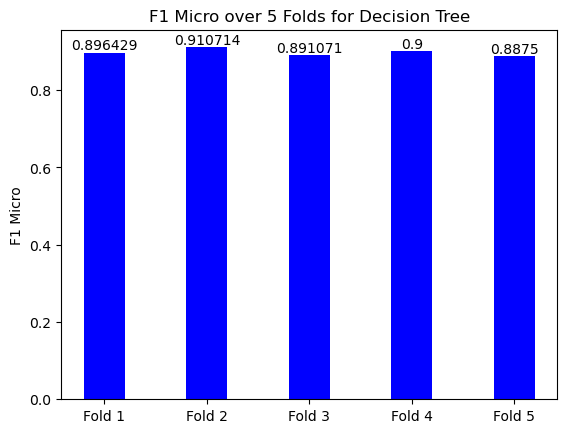

0.8971428571428571


In [159]:
decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                     random_state=_random_state)

scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "Decision Tree"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for Decision Tree')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

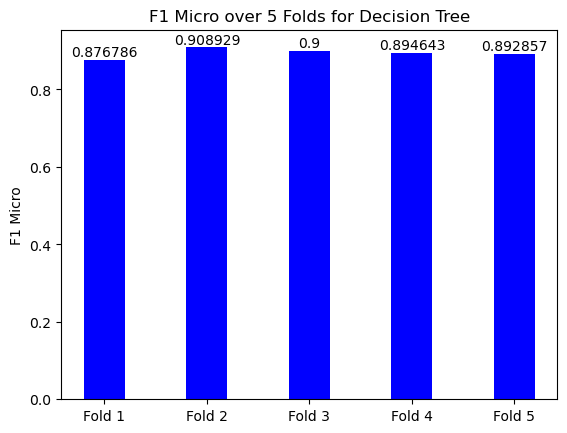

0.8946428571428573


In [160]:
decision_tree_model = DecisionTreeClassifier(criterion="gini",
                                     random_state=_random_state)

scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "Decision Tree"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for Decision Tree')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

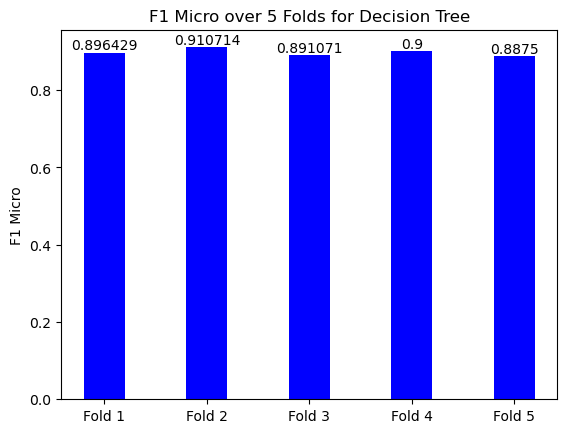

0.8971428571428571


In [161]:
decision_tree_model = DecisionTreeClassifier(criterion="log_loss",
                                     random_state=_random_state)

scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "Decision Tree"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for Decision Tree')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

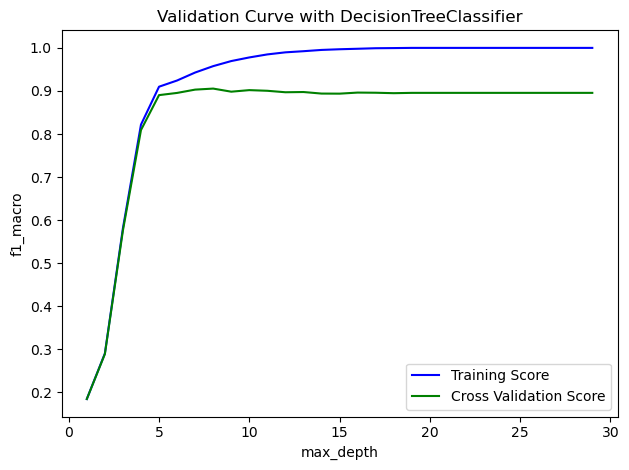

Indices: [7 6 9]
Values: [0.90547664 0.90310017 0.90190334]


In [164]:
f, train_scores, valid_scores = get_validation_curve(DecisionTreeClassifier(random_state=_random_state), X_train, y_train, "max_depth", 1, 30, 1, 'f1_macro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

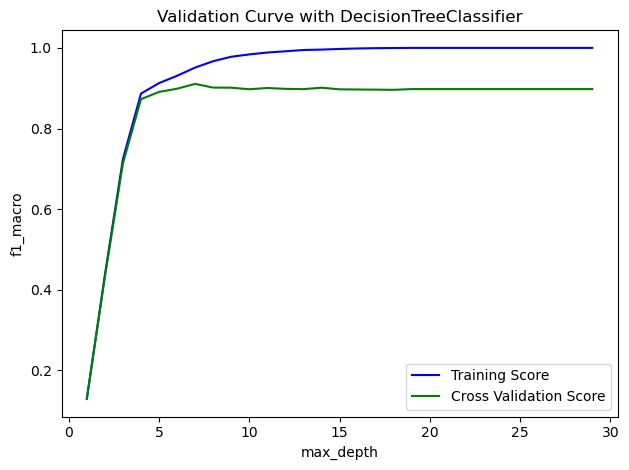

Indices: [6 7 8]
Values: [0.91061414 0.9014816  0.90129256]


In [165]:
f, train_scores, valid_scores = get_validation_curve(DecisionTreeClassifier(random_state=_random_state, criterion='entropy'), X_train, y_train, "max_depth", 1, 30, 1, 'f1_macro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

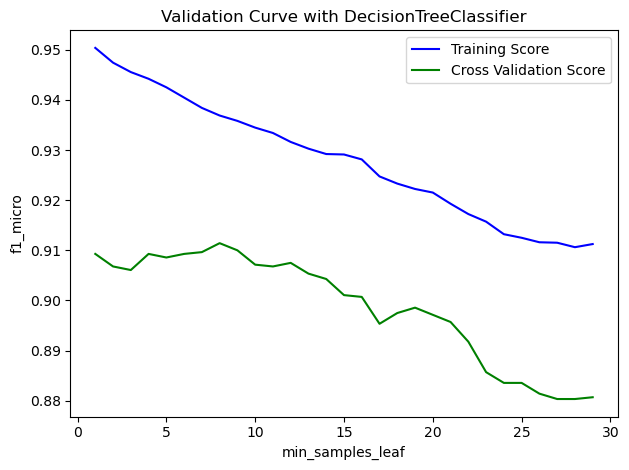

Indices: [7 8 6]
Values: [0.91142857 0.91       0.90964286]


In [169]:
f, train_scores, valid_scores = get_validation_curve(DecisionTreeClassifier(random_state=_random_state, criterion='entropy', max_depth=7), X_train, y_train, "min_samples_leaf", 1, 30, 1, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

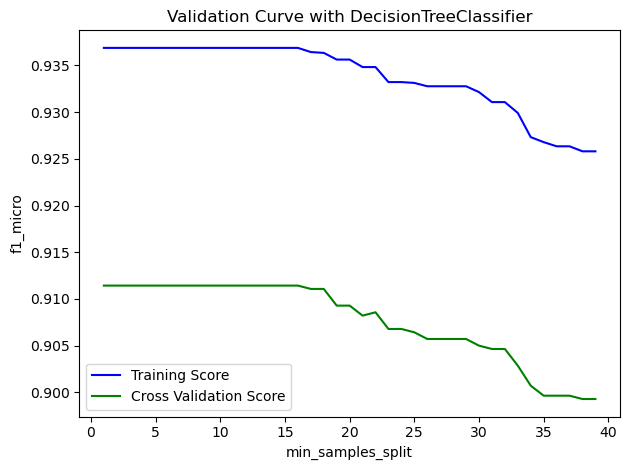

Indices: [ 0  9 15]
Values: [0.91142857 0.91142857 0.91142857]


In [172]:
f, train_scores, valid_scores = get_validation_curve(DecisionTreeClassifier(random_state=_random_state, criterion='entropy', max_depth=7, min_samples_leaf=8), X_train, y_train, "min_samples_split", 1, 40, 1, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

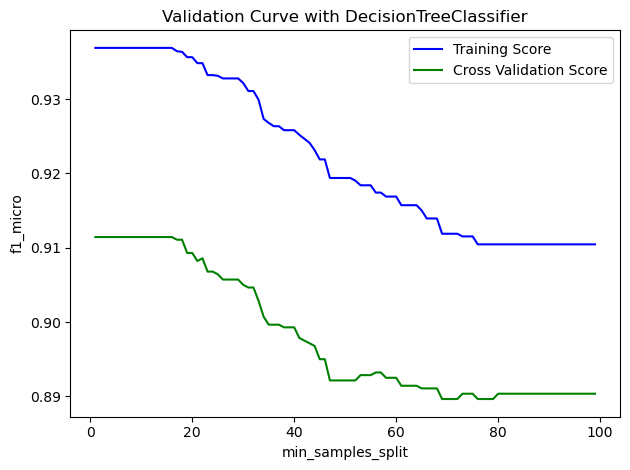

Indices: [ 0  8 15]
Values: [0.91142857 0.91142857 0.91142857]


In [173]:
f, train_scores, valid_scores = get_validation_curve(DecisionTreeClassifier(random_state=_random_state, criterion='entropy', max_depth=7, min_samples_leaf=8), X_train, y_train, "min_samples_split", 1, 100, 1, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

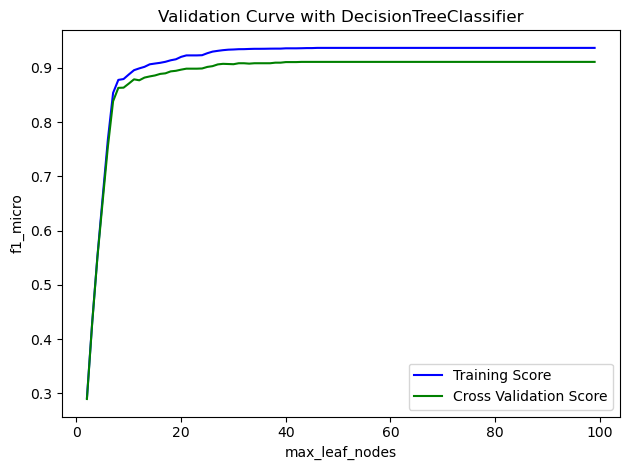

Indices: [ 0 55 67]
Values: [       nan 0.91107143 0.91107143]


In [174]:
f, train_scores, valid_scores = get_validation_curve(DecisionTreeClassifier(random_state=_random_state, criterion='entropy', max_depth=7, min_samples_leaf=8), X_train, y_train, "max_leaf_nodes", 1, 100, 1, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

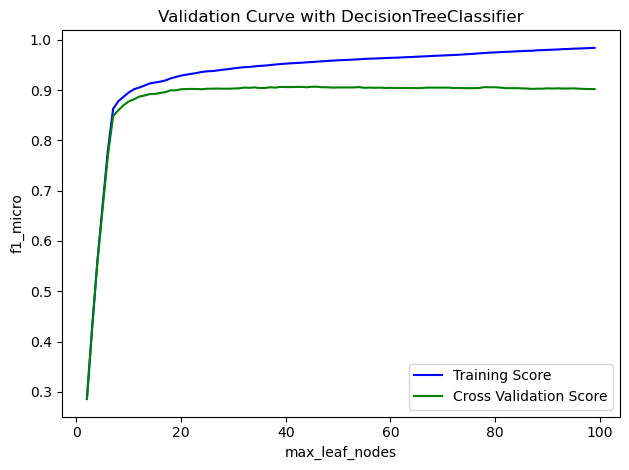

Indices: [ 0 45 44]
Values: [       nan 0.90678571 0.90678571]


In [175]:
f, train_scores, valid_scores = get_validation_curve(DecisionTreeClassifier(random_state=_random_state), X_train, y_train, "max_leaf_nodes", 1, 100, 1, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

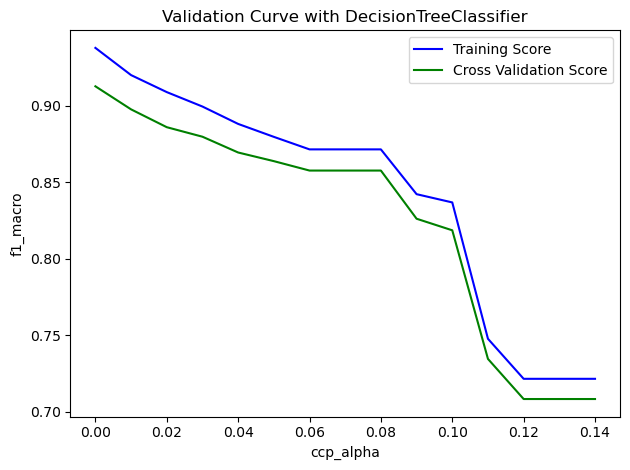

Indices: [0 1 2]
Values: [0.91257431 0.89750576 0.88586034]


In [177]:
f, train_scores, valid_scores = get_validation_curve(DecisionTreeClassifier(random_state=_random_state, criterion='entropy', max_depth=7, min_samples_leaf=8), X_train, y_train, "ccp_alpha", 0, 0.15, 0.01, 'f1_macro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

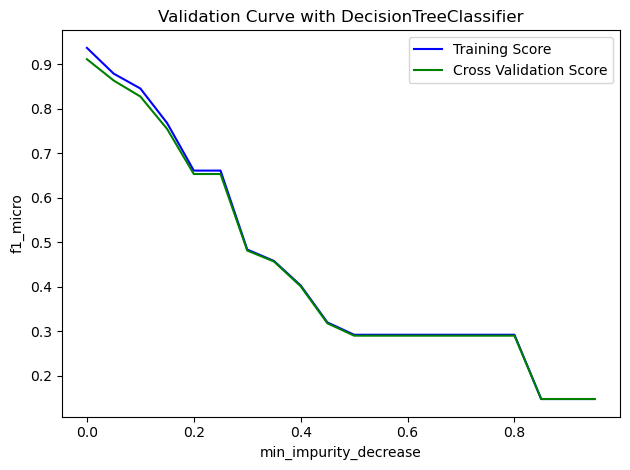

Indices: [0 1 2]
Values: [0.91142857 0.86357143 0.8275    ]


In [179]:
f, train_scores, valid_scores = get_validation_curve(DecisionTreeClassifier(random_state=_random_state, criterion='entropy', max_depth=7, min_samples_leaf=8), X_train, y_train, "min_impurity_decrease", 0, 1, 0.05, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

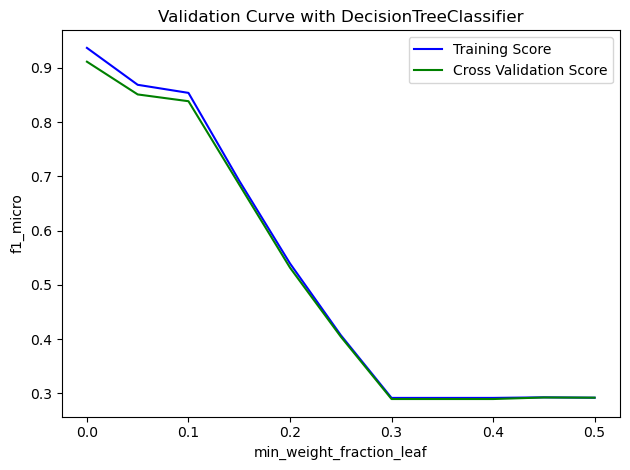

Indices: [19 18 17]
Values: [nan nan nan]


In [180]:
f, train_scores, valid_scores = get_validation_curve(DecisionTreeClassifier(random_state=_random_state, criterion='entropy', max_depth=7, min_samples_leaf=8), X_train, y_train, "min_weight_fraction_leaf", 0, 1, 0.05, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

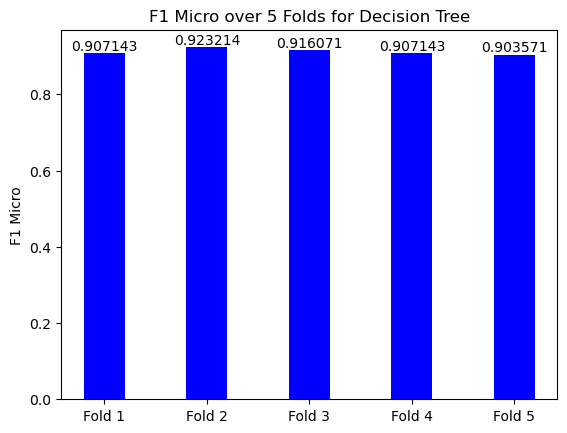

0.9114285714285714


In [183]:
decision_tree_model = DecisionTreeClassifier(random_state=_random_state, criterion='entropy', max_depth=7, min_samples_leaf=8)

scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "Decision Tree"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for Decision Tree')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

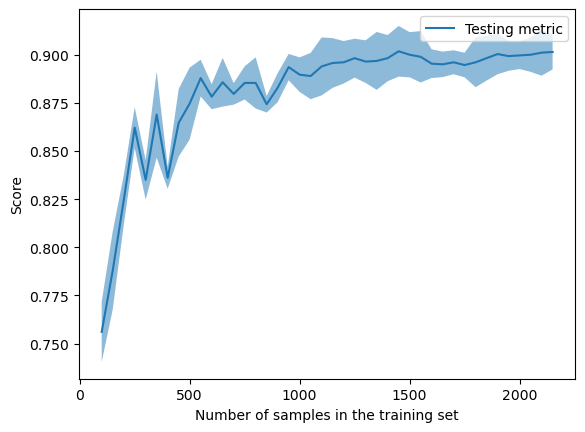

In [185]:
LearningCurveDisplay.from_estimator(
   DecisionTreeClassifier(random_state=_random_state, criterion='entropy', max_depth=7, min_samples_leaf=8), X_train, y_train, train_sizes=np.arange(100, 2200, 50), cv=5, scoring='f1_micro')

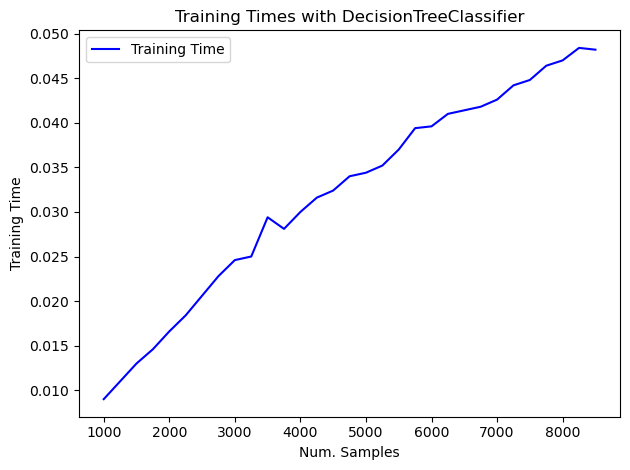

In [186]:
get_training_time(DecisionTreeClassifier(random_state=_random_state, criterion='entropy', max_depth=7, min_samples_leaf=8), X_train, y_train)

In [218]:
dt = DecisionTreeClassifier(random_state=_random_state, criterion='entropy', max_depth=7, min_samples_leaf=8)

dt = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy, f1 = model_evaluation(y_test, y_pred)
print('Accuracy: ', accuracy)
print('F1 Micro: ', f1)

Accuracy:  0.8957142857142857
F1 Micro:  0.8957142857142857


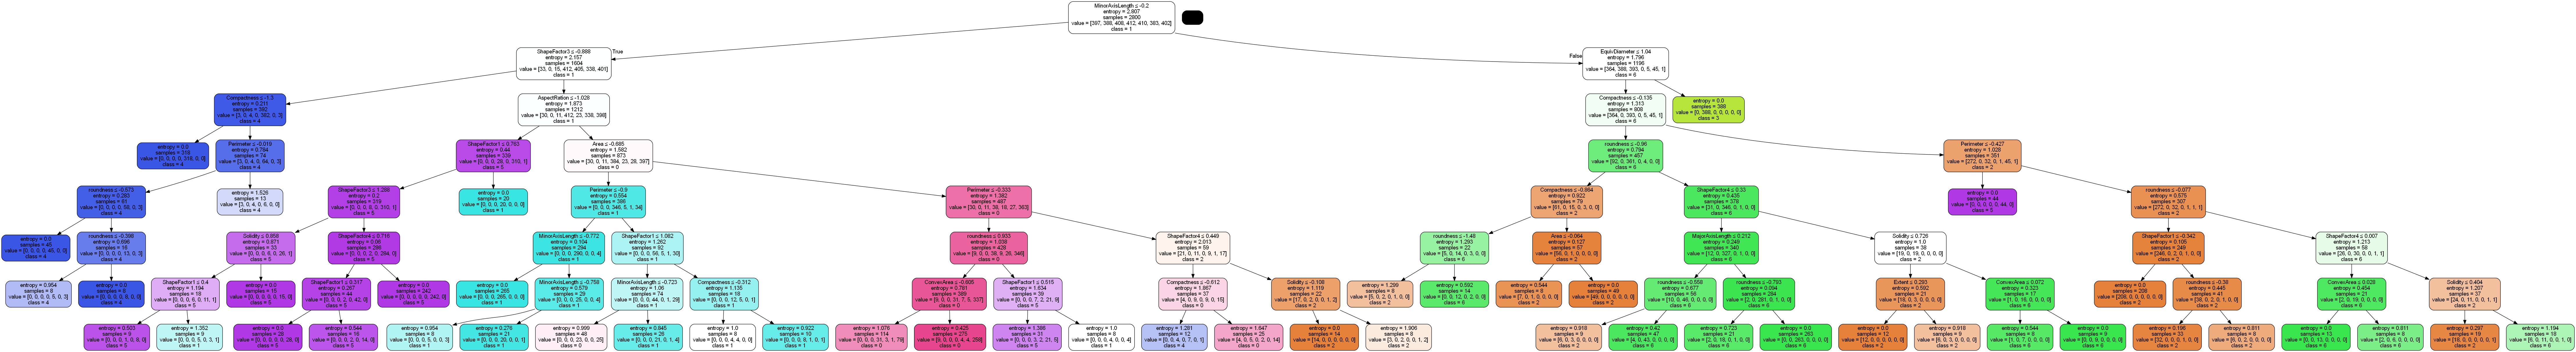

In [188]:
feature_cols = list(X_train.columns)
classes = y_train.astype(str).unique()

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=classes)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

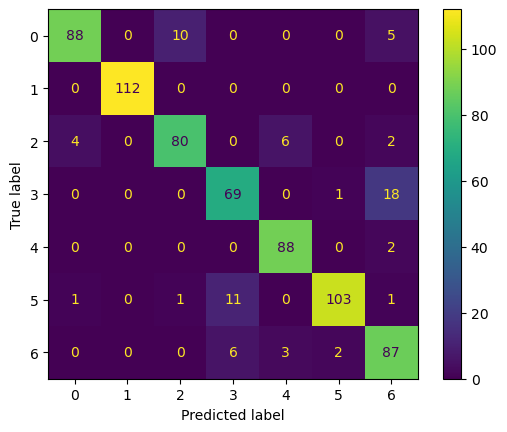

In [219]:
cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()

## KNN

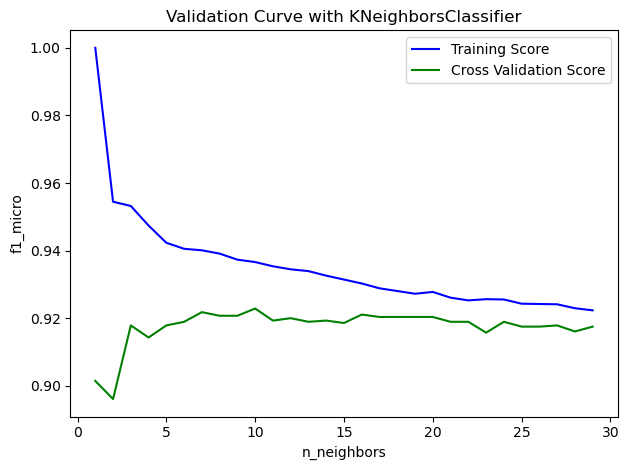

Indices: [ 9  6 15]
Values: [0.92285714 0.92178571 0.92107143]


In [189]:
f, train_scores, valid_scores = get_validation_curve(KNeighborsClassifier(), X_train, y_train, "n_neighbors", 1, 30, 1, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

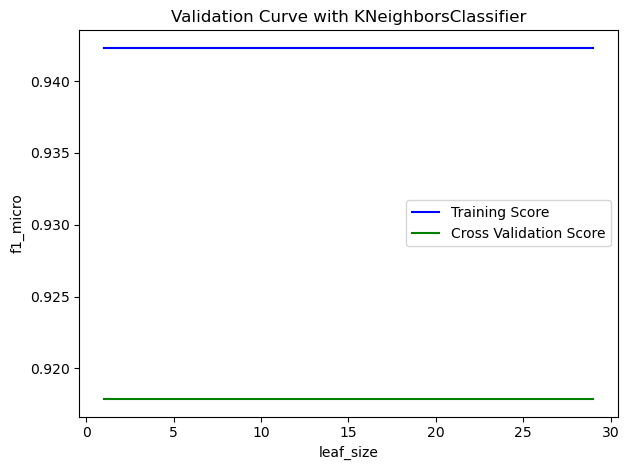

Indices: [28 13  1]
Values: [0.91785714 0.91785714 0.91785714]


In [191]:
f, train_scores, valid_scores = get_validation_curve(KNeighborsClassifier(), X_train, y_train, "leaf_size", 1, 30, 1, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

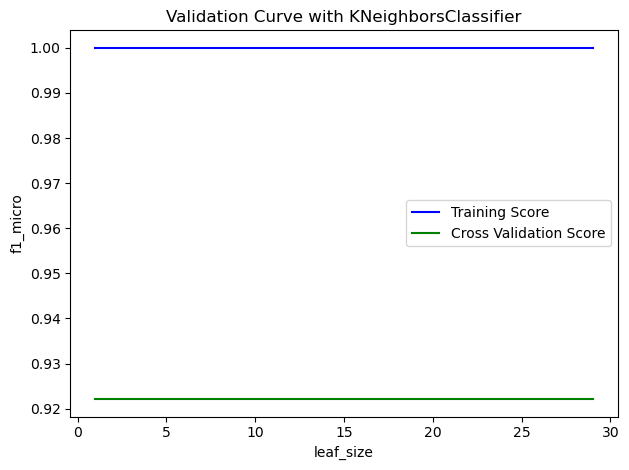

Indices: [28 13  1]
Values: [0.92214286 0.92214286 0.92214286]


In [192]:
f, train_scores, valid_scores = get_validation_curve(KNeighborsClassifier(weights='distance', n_neighbors=10), X_train, y_train, "leaf_size", 1, 30, 1, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

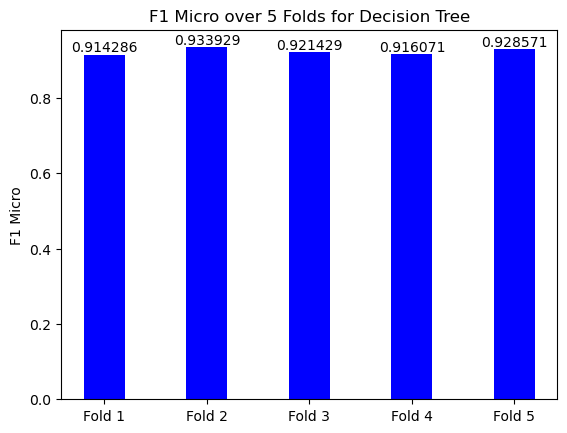

0.9228571428571428


In [198]:
decision_tree_model = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=10)

scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "Decision Tree"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for Decision Tree')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

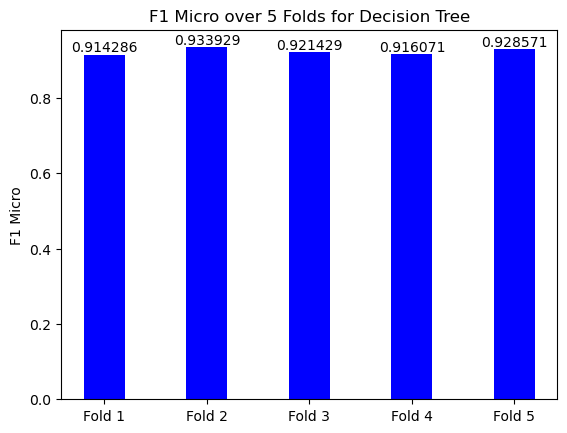

0.9228571428571428


In [199]:
decision_tree_model = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=10)

scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "Decision Tree"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for Decision Tree')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

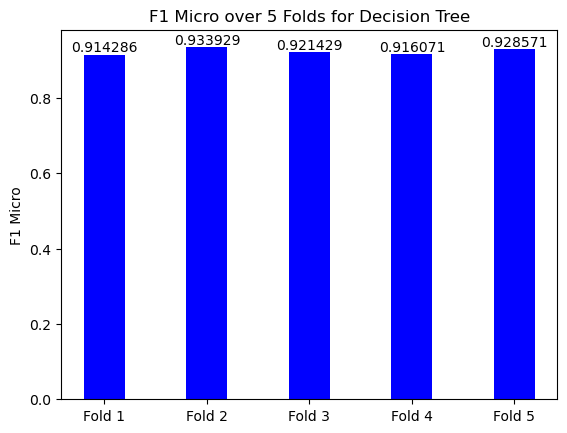

0.9228571428571428


In [200]:
decision_tree_model = KNeighborsClassifier(algorithm='brute', n_neighbors=10)

scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "Decision Tree"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for Decision Tree')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

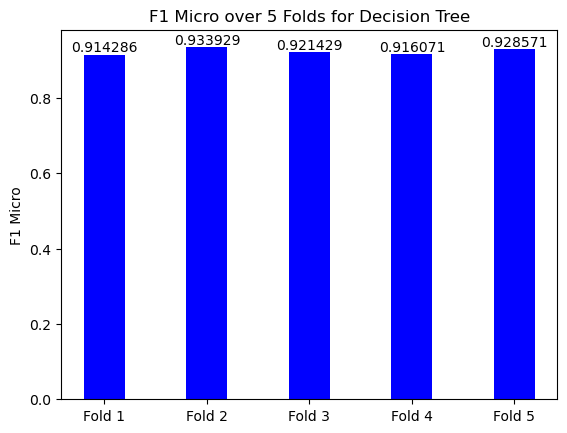

0.9228571428571428


In [201]:
decision_tree_model = KNeighborsClassifier(algorithm='auto', n_neighbors=10)

scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "Decision Tree"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for Decision Tree')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

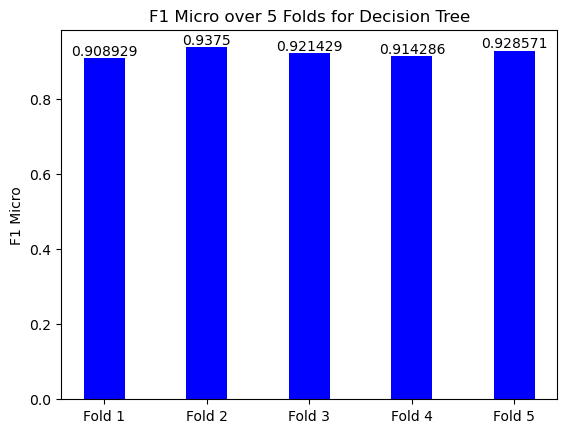

0.9221428571428572


In [202]:
decision_tree_model = KNeighborsClassifier(weights='distance', n_neighbors=10)

scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "Decision Tree"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for Decision Tree')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

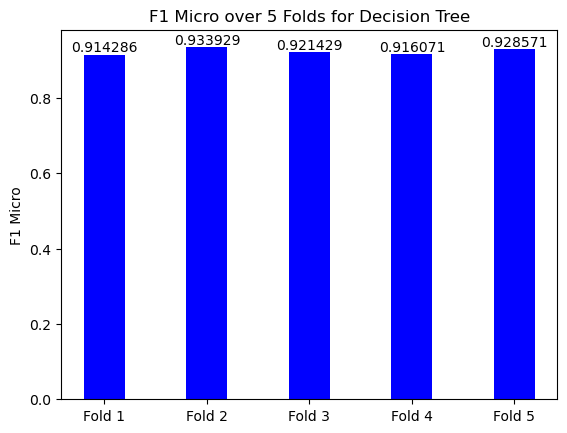

0.9228571428571428


In [204]:
decision_tree_model = KNeighborsClassifier(n_neighbors=10, p=2)

scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "Decision Tree"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for Decision Tree')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

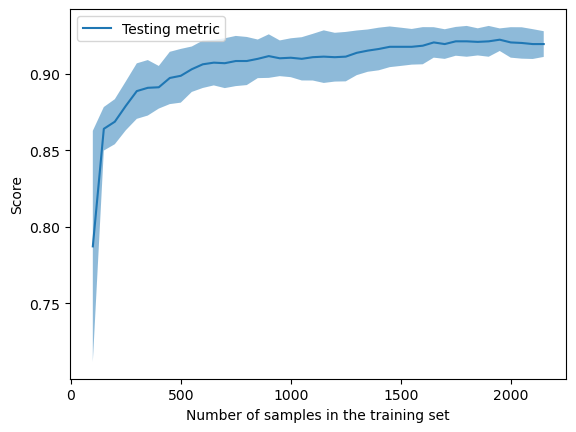

In [206]:
LearningCurveDisplay.from_estimator(
   KNeighborsClassifier(n_neighbors=10), X_train, y_train, train_sizes=np.arange(100, 2200, 50), cv=5, scoring='f1_micro')

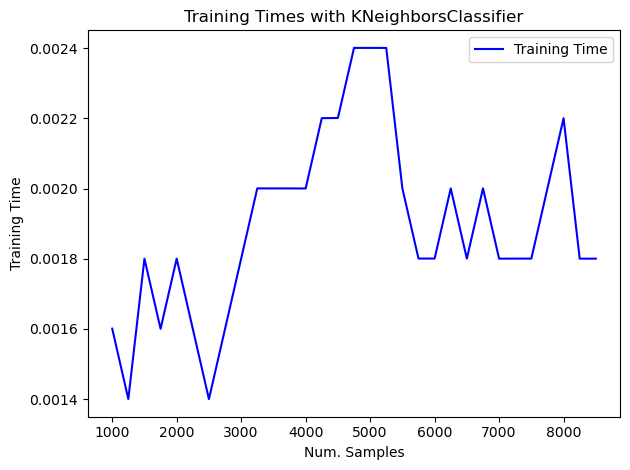

In [207]:
get_training_time(KNeighborsClassifier(n_neighbors=10), X_train, y_train)


In [220]:
knn = KNeighborsClassifier(n_neighbors=10)

knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy, f1 = model_evaluation(y_test, y_pred)
print('Accuracy: ', accuracy)
print('F1 Micro: ', f1)

Accuracy:  0.9228571428571428
F1 Micro:  0.9228571428571428


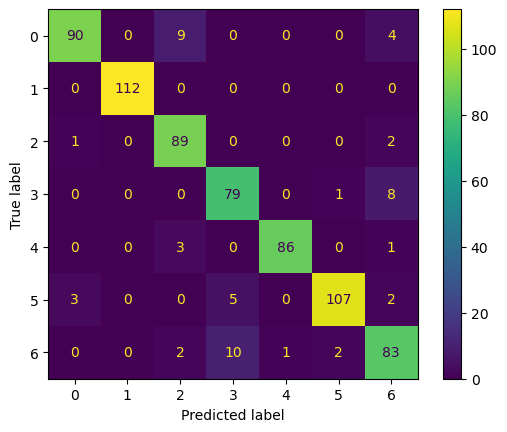

In [221]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

## Boosting

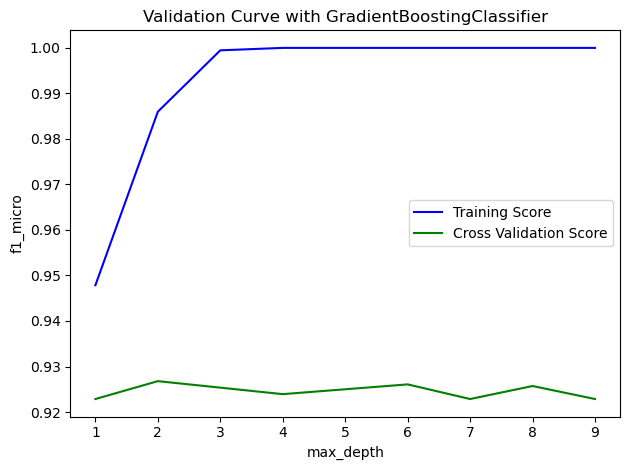

Indices: [1 5 7]
Values: [0.92678571 0.92607143 0.92571429]


In [210]:
f, train_scores, valid_scores = get_validation_curve(GradientBoostingClassifier(random_state=_random_state), X_train, y_train, "max_depth", 1, 10, 1, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

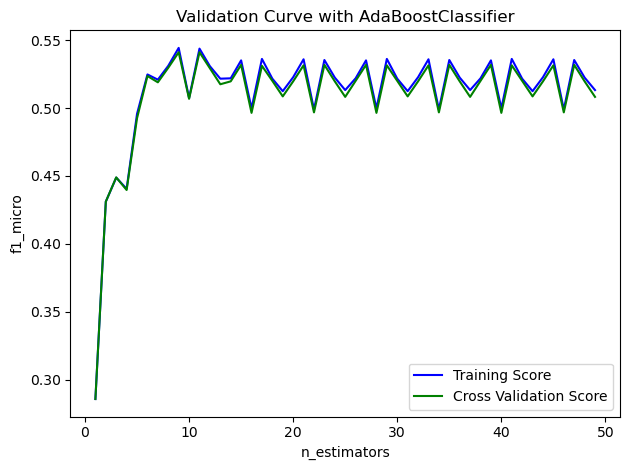

Indices: [ 8 10 14]
Values: [0.54107143 0.54107143 0.53178571]


In [213]:
f, train_scores, valid_scores = get_validation_curve(AdaBoostClassifier(random_state=_random_state), X_train, y_train, "n_estimators", 1, 50, 1, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

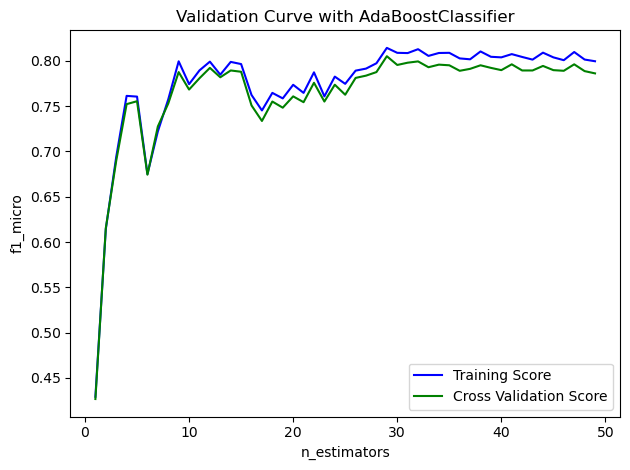

Indices: [28 31 30]
Values: [0.805      0.79928571 0.79785714]


In [223]:
f, train_scores, valid_scores = get_validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), random_state=_random_state), X_train, y_train, "n_estimators", 1, 50, 1, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

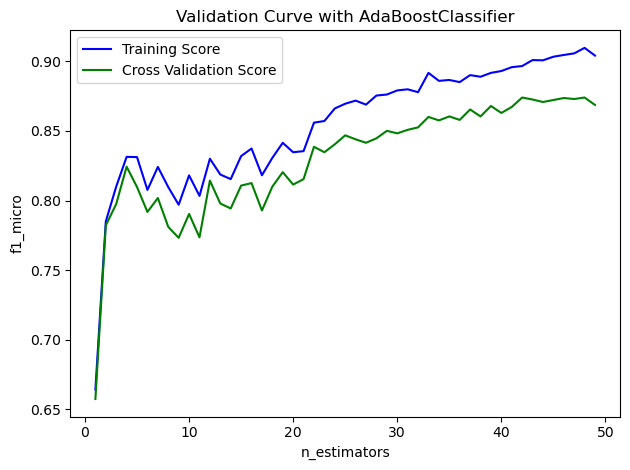

Indices: [47 41 45]
Values: [0.87392857 0.87392857 0.87357143]


In [224]:
f, train_scores, valid_scores = get_validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), random_state=_random_state), X_train, y_train, "n_estimators", 1, 50, 1, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

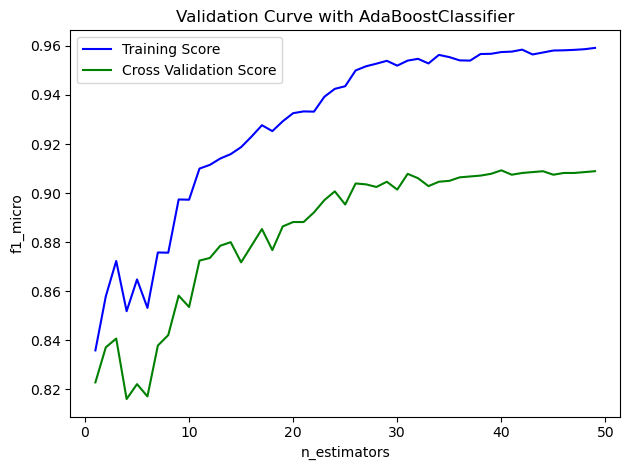

Indices: [39 43 48]
Values: [0.90928571 0.90892857 0.90892857]


In [225]:
f, train_scores, valid_scores = get_validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), random_state=_random_state), X_train, y_train, "n_estimators", 1, 50, 1, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

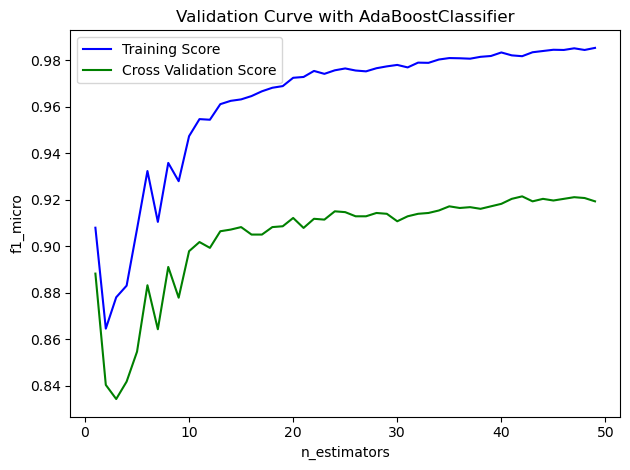

Indices: [41 46 47]
Values: [0.92142857 0.92107143 0.92071429]


In [226]:
f, train_scores, valid_scores = get_validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), random_state=_random_state), X_train, y_train, "n_estimators", 1, 50, 1, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

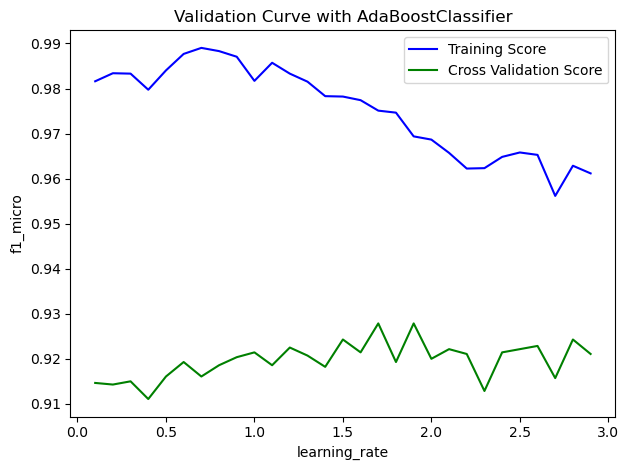

Indices: [ 0 17 19]
Values: [       nan 0.92785714 0.92785714]


In [229]:
f, train_scores, valid_scores = get_validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), random_state=_random_state, n_estimators=42), X_train, y_train, "learning_rate", 0, 3, 0.1, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

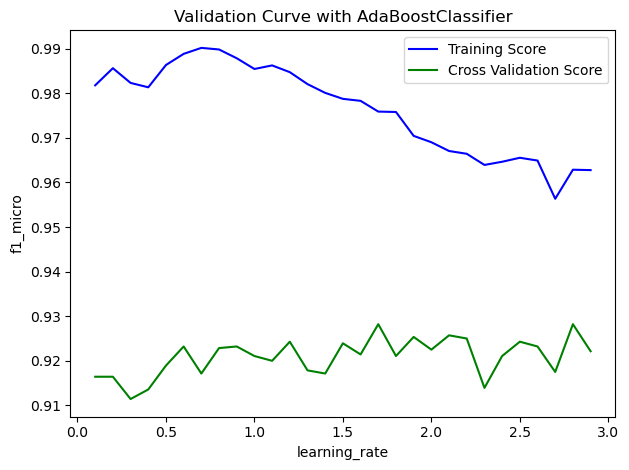

Indices: [ 0 17 28]
Values: [       nan 0.92821429 0.92821429]


In [230]:
f, train_scores, valid_scores = get_validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), random_state=_random_state), X_train, y_train, "learning_rate", 0, 3, 0.1, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

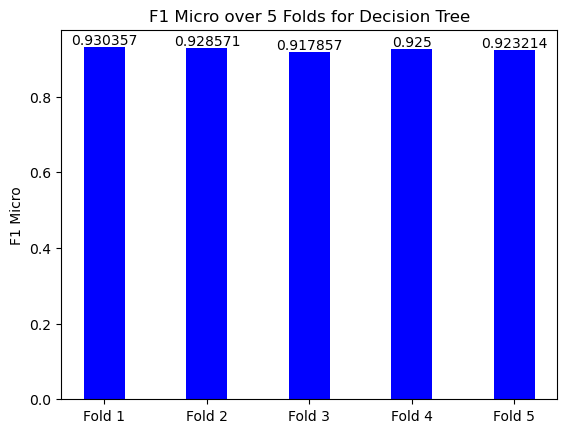

0.925


In [239]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), random_state=_random_state, learning_rate=1.7)

scores = cross_val_score(ada, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "AdaBoost"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for Decision Tree')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

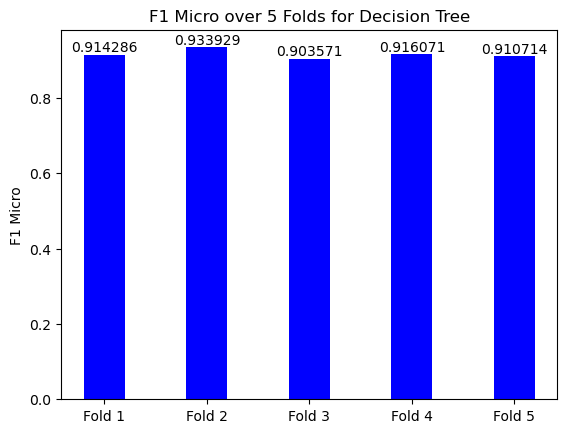

0.9157142857142857


In [240]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), random_state=_random_state, learning_rate=1.7, algorithm='SAMME')

scores = cross_val_score(ada, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "AdaBoost"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for Decision Tree')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

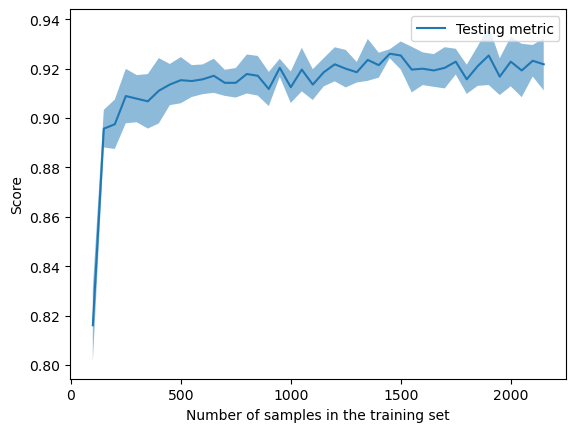

In [241]:
LearningCurveDisplay.from_estimator(
   AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), random_state=_random_state, learning_rate=1.7), X_train, y_train, train_sizes=np.arange(100, 2200, 50), cv=5, scoring='f1_micro')

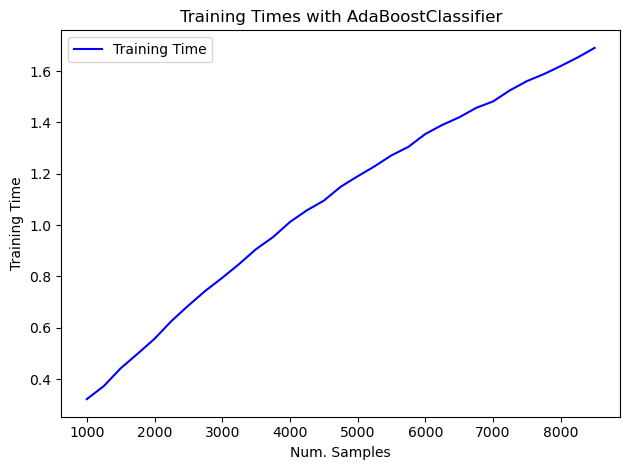

In [242]:
get_training_time(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), random_state=_random_state, learning_rate=1.7), X_train, y_train)

In [243]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), random_state=_random_state, learning_rate=1.7)

ada = ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

accuracy, f1 = model_evaluation(y_test, y_pred)
print('Accuracy: ', accuracy)
print('F1: ', f1)

Accuracy:  0.9214285714285714
F1:  0.9214285714285714


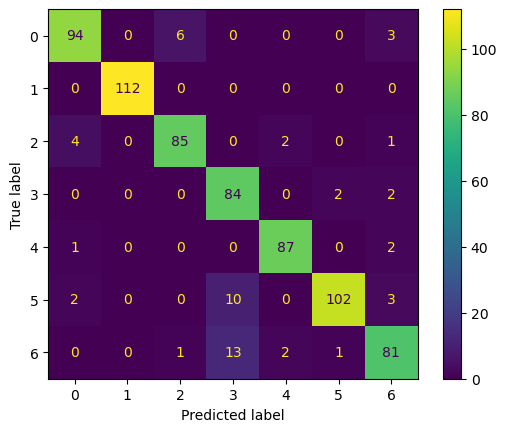

In [244]:
cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()

## Neural Network

In [73]:
one_layer_sizes = [(10,), (20,), (30,), (40,), (50,), (60,), (70,), (80,), (90,), (100,), (110,), (120,), (130,), (140,), (150,), (160,), (170,), (180,), (190,), (200,), (250,), (300,)]
lbfgs = [(2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,)]
two_layer_sizes = [(10,10), (10,20), (20,20), (20,10), (20,30), (30,30), (10,30), (30,10), (30,20), (40,40), (50,50), (60,60), (100,100), (200,200)]
three_layer_sizes = [(10,10,10), (10,20,10), (20,20,20), (20,20,10), (20,30,20), (30,30,30), (20,50,20), (20,100,20), (50,30,10), (50,40,30), (100,50,20), (100,100,20)]

In [31]:
one_layer_train_results = []
one_layer_val_results = []
one_layer_train_time = []
for i in one_layer_sizes:
    mlp = MLPClassifier(random_state=_random_state, hidden_layer_sizes=i)
    mlp_result = cross_validation(mlp, X_train, y_train, 5)
    one_layer_train_results.append(mlp_result["train_score"].mean())
    one_layer_val_results.append(mlp_result["test_score"].mean())
    one_layer_train_time.append(mlp_result['fit_time'].mean())

c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\sit

0.9382142857142858


<Figure size 640x480 with 0 Axes>

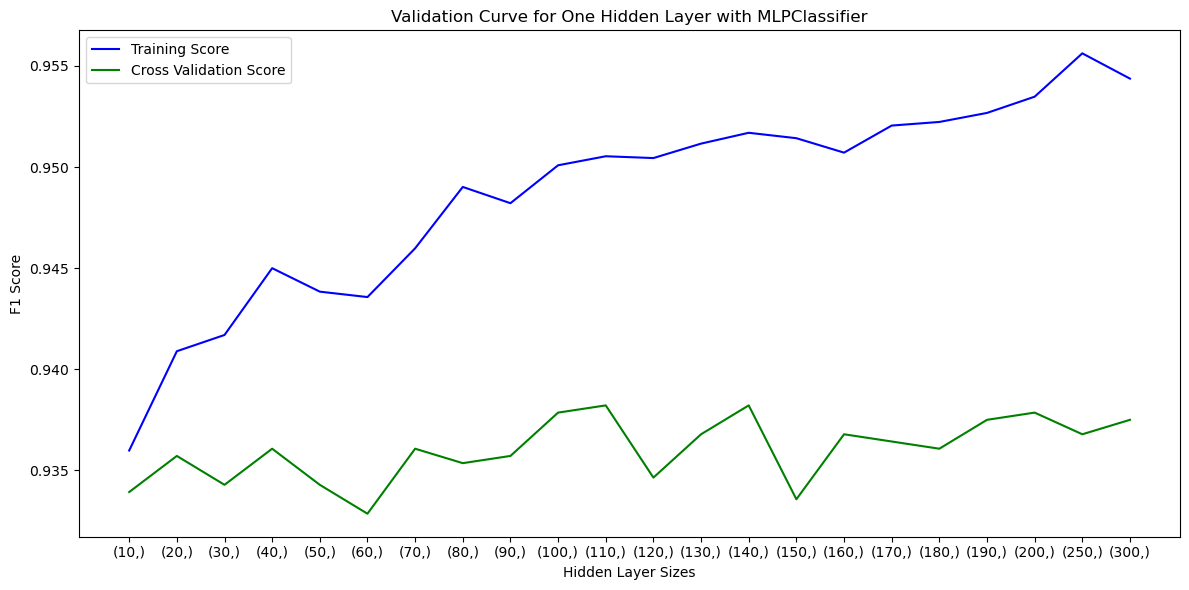

In [33]:
labels = ['(10,)', '(20,)', '(30,)', '(40,)', '(50,)', '(60,)', '(70,)', '(80,)', '(90,)', '(100,)', '(110,)', '(120,)', '(130,)', '(140,)', '(150,)', '(160,)', '(170,)', '(180,)', '(190,)', '(200,)', '(250,)', '(300,)']

fig = plt.figure()
plt.figure(figsize=(12,6))
plt.plot(labels, one_layer_train_results,
    label = "Training Score", color = 'b')
plt.plot(labels, one_layer_val_results,
    label = "Cross Validation Score", color = 'g')
# plt.plot(labels, one_layer_train_time,
#     label = "Training Time", color = 'r')

# Creating the plot
plt.title(f"Validation Curve for One Hidden Layer with {mlp.__class__.__name__}")
plt.xlabel("Hidden Layer Sizes")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.legend(loc = 'best')


print(max(one_layer_val_results))

In [74]:
one_layer_train_results = []
one_layer_val_results = []
one_layer_train_time = []
for i in lbfgs:
    mlp = MLPClassifier(random_state=_random_state, hidden_layer_sizes=i, solver='lbfgs')
    mlp_result = cross_validation(mlp, X_train, y_train, 5)
    one_layer_train_results.append(mlp_result["train_score"].mean())
    one_layer_val_results.append(mlp_result["test_score"].mean())
    one_layer_train_time.append(mlp_result['fit_time'].mean())

c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1)

0.9332142857142858


<Figure size 640x480 with 0 Axes>

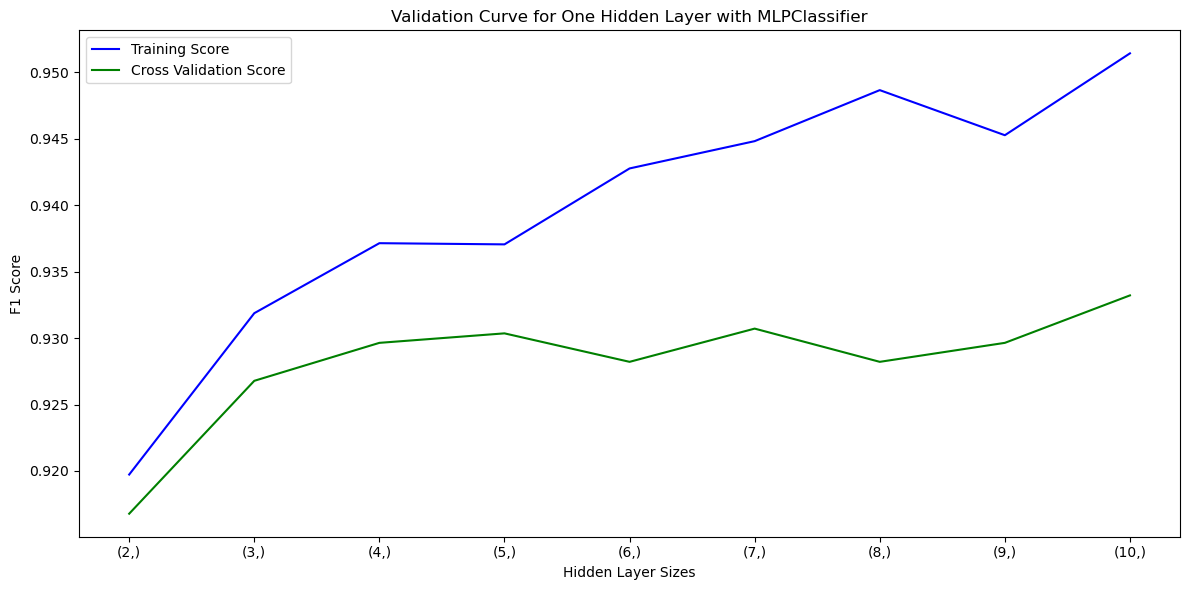

In [75]:
lbfgs = ['(2,)', '(3,)', '(4,)', '(5,)', '(6,)', '(7,)', '(8,)', '(9,)', '(10,)']

fig = plt.figure()
plt.figure(figsize=(12,6))
plt.plot(lbfgs, one_layer_train_results,
    label = "Training Score", color = 'b')
plt.plot(lbfgs, one_layer_val_results,
    label = "Cross Validation Score", color = 'g')
# plt.plot(labels, one_layer_train_time,
#     label = "Training Time", color = 'r')

# Creating the plot
plt.title(f"Validation Curve for One Hidden Layer with {mlp.__class__.__name__}")
plt.xlabel("Hidden Layer Sizes")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.legend(loc = 'best')


print(max(one_layer_val_results))

In [34]:
two_layer_train_results = []
two_layer_val_results = []
two_layer_train_time = []
for i in two_layer_sizes:
    mlp = MLPClassifier(random_state=_random_state, hidden_layer_sizes=i)
    mlp_result = cross_validation(mlp, X_train, y_train, 5)
    two_layer_train_results.append(mlp_result["train_score"].mean())
    two_layer_val_results.append(mlp_result["test_score"].mean())
    two_layer_train_time.append(mlp_result['fit_time'].mean())

c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\sit

0.9367857142857143


<Figure size 640x480 with 0 Axes>

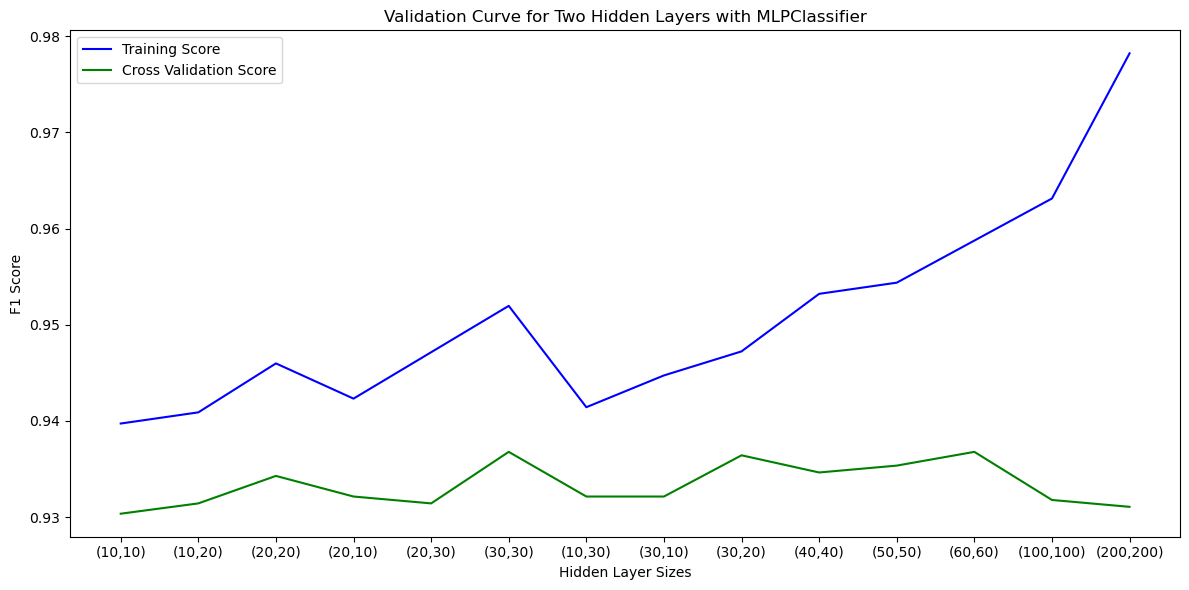

In [71]:
labels = ['(10,10)', '(10,20)', '(20,20)', '(20,10)', '(20,30)', '(30,30)', '(10,30)', '(30,10)', '(30,20)', '(40,40)', '(50,50)', '(60,60)', '(100,100)', '(200,200)']

fig = plt.figure()
plt.figure(figsize=(12,6))
plt.plot(labels, two_layer_train_results,
    label = "Training Score", color = 'b')
plt.plot(labels, two_layer_val_results,
    label = "Cross Validation Score", color = 'g')

# Creating the plot
plt.title(f"Validation Curve for Two Hidden Layers with {mlp.__class__.__name__}")
plt.xlabel("Hidden Layer Sizes")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.legend(loc = 'best')


print(max(two_layer_val_results))

In [40]:
three_layer_train_results = []
three_layer_val_results = []
three_layer_train_time = []
for i in three_layer_sizes:
    mlp = MLPClassifier(random_state=_random_state, hidden_layer_sizes=i)
    mlp_result = cross_validation(mlp, X_train, y_train, 5)
    three_layer_train_results.append(mlp_result["train_score"].mean())
    three_layer_val_results.append(mlp_result["test_score"].mean())
    three_layer_train_time.append(mlp_result['fit_time'].mean())

c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\sit

In [39]:
len(three_layer_train_results)
labels = ['(10,10,10)', '(10,20,10)', '(20,20,20)', '(20,20,10)', '(20,30,20)', '(30,30,30)', '(20,50,20)', '(20,100,20)', '(50,30,10)', '(50,40,30)', '(100,50,20)', '(100,100,20)']
len(labels)

12

0.9385714285714286


<Figure size 640x480 with 0 Axes>

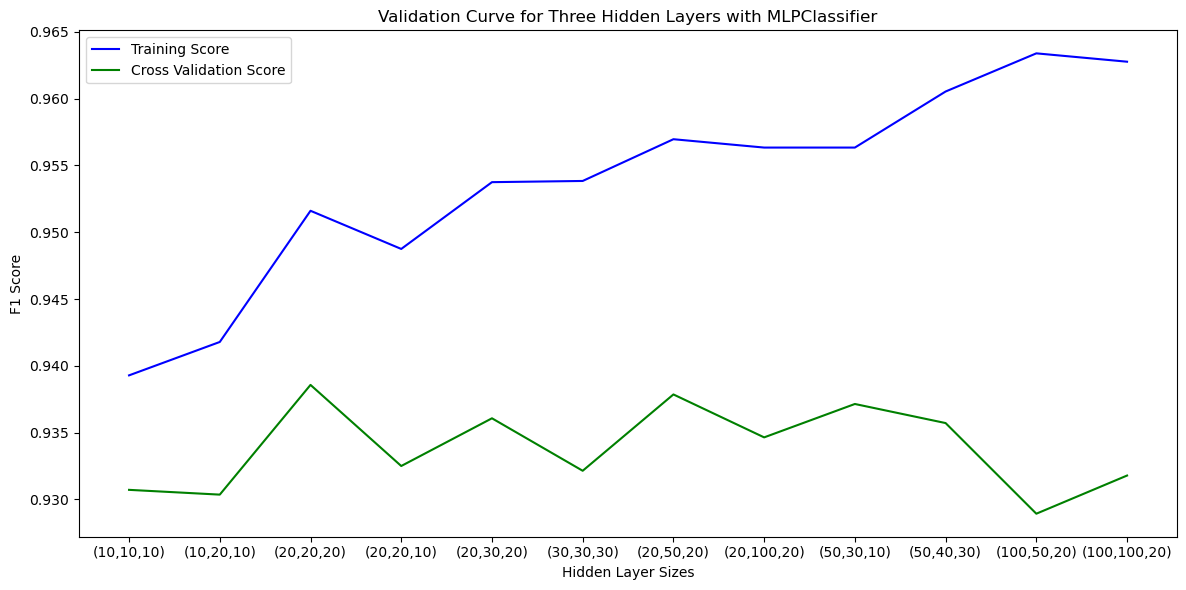

In [41]:
labels = ['(10,10,10)', '(10,20,10)', '(20,20,20)', '(20,20,10)', '(20,30,20)', '(30,30,30)', '(20,50,20)', '(20,100,20)', '(50,30,10)', '(50,40,30)', '(100,50,20)', '(100,100,20)']

fig = plt.figure()
plt.figure(figsize=(12,6))
plt.plot(labels, three_layer_train_results,
    label = "Training Score", color = 'b')
plt.plot(labels, three_layer_val_results,
    label = "Cross Validation Score", color = 'g')

# Creating the plot
plt.title(f"Validation Curve for Three Hidden Layers with {mlp.__class__.__name__}")
plt.xlabel("Hidden Layer Sizes")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.legend(loc = 'best')


print(max(three_layer_val_results))

c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\sit

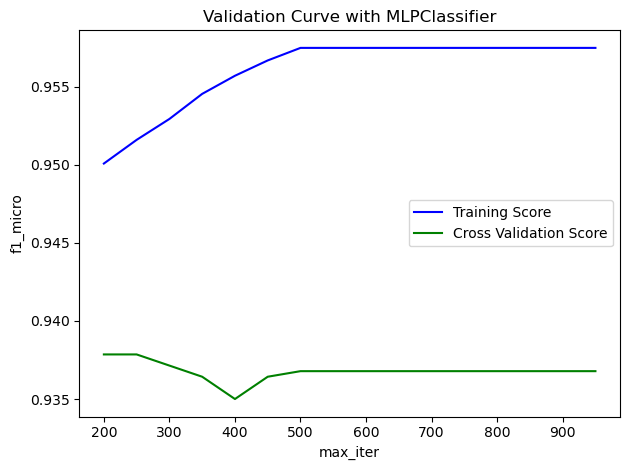

Indices: [1 0 2]
Values: [0.93785714 0.93785714 0.93714286]


In [30]:
f, train_scores, valid_scores = get_validation_curve(MLPClassifier(random_state=_random_state), X_train, y_train, "max_iter", 200, 1000, 50, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1)

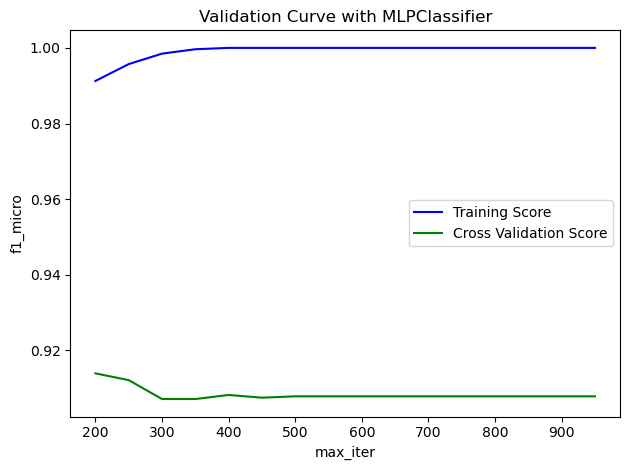

Indices: [0 1 4]
Values: [0.91392857 0.91214286 0.90821429]


In [65]:
f, train_scores, valid_scores = get_validation_curve(MLPClassifier(random_state=_random_state, solver='lbfgs'), X_train, y_train, "max_iter", 200, 1000, 50, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\sit

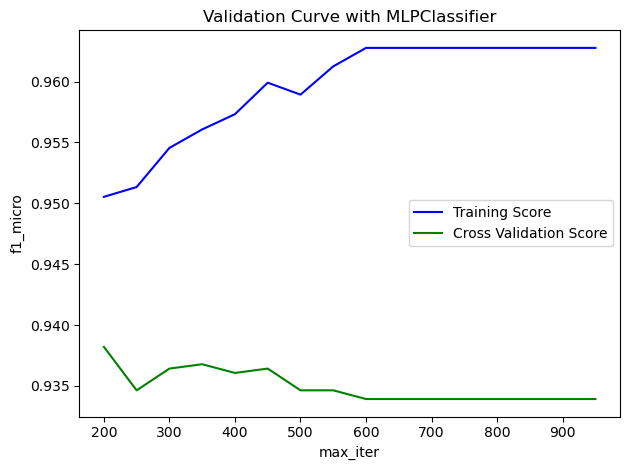

Indices: [0 3 5]
Values: [0.93821429 0.93678571 0.93642857]


In [43]:
f, train_scores, valid_scores = get_validation_curve(MLPClassifier(random_state=_random_state, hidden_layer_sizes=(110,)), X_train, y_train, "max_iter", 200, 1000, 50, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

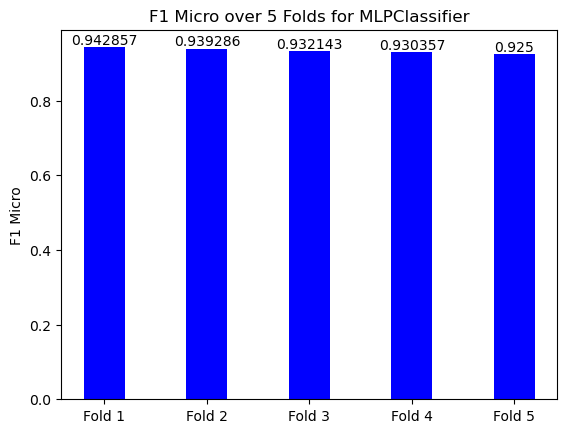

0.9339285714285713


In [47]:
mlp = MLPClassifier(random_state=_random_state, hidden_layer_sizes=(110,), activation='logistic', max_iter=550)

scores = cross_val_score(mlp, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "MLPClassifier"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for MLPClassifier')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

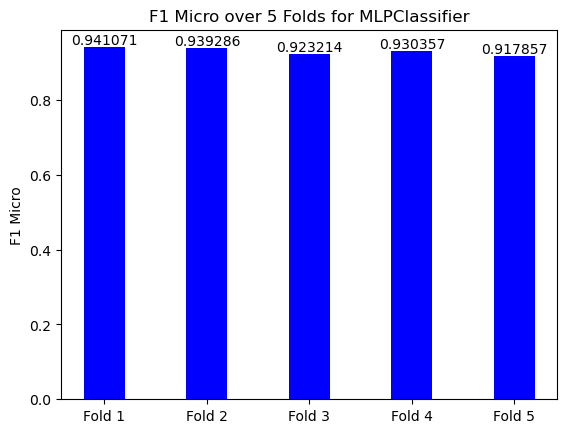

0.9303571428571429


In [49]:
mlp = MLPClassifier(random_state=_random_state, hidden_layer_sizes=(110,), activation='identity')

scores = cross_val_score(mlp, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "MLPClassifier"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for MLPClassifier')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\sit

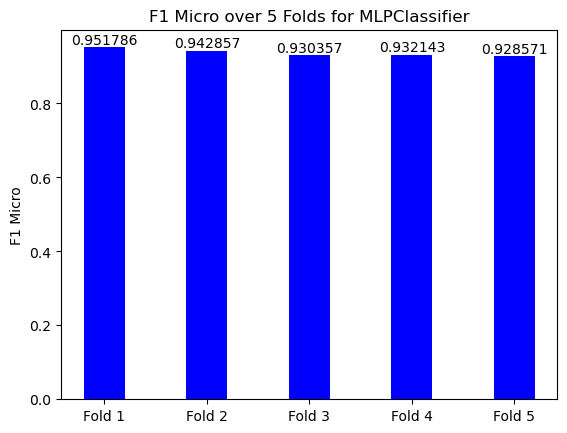

0.9371428571428572


In [51]:
mlp = MLPClassifier(random_state=_random_state, hidden_layer_sizes=(110,), activation='tanh')

scores = cross_val_score(mlp, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "MLPClassifier"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for MLPClassifier')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\sit

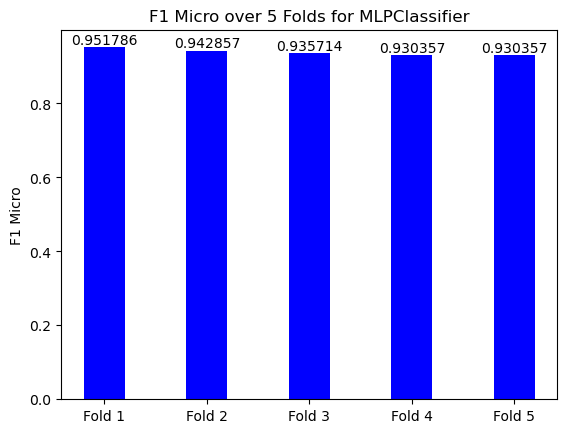

0.9382142857142857


In [54]:
mlp = MLPClassifier(random_state=_random_state, hidden_layer_sizes=(110,), activation='relu')

scores = cross_val_score(mlp, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "MLPClassifier"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for MLPClassifier')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\sit

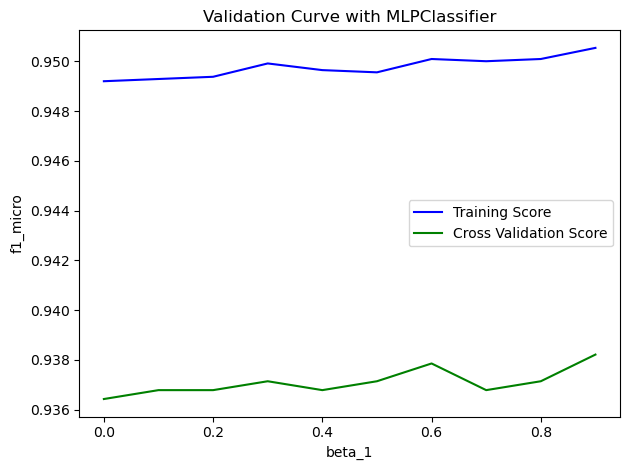

Indices: [9 6 5]
Values: [0.93821429 0.93785714 0.93714286]


In [57]:
f, train_scores, valid_scores = get_validation_curve(MLPClassifier(random_state=_random_state, hidden_layer_sizes=(110,)), X_train, y_train, "beta_1", 0, 1.0, 0.1, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\sit

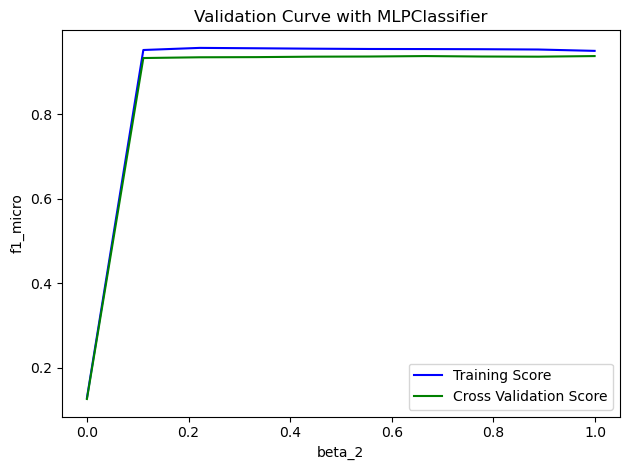

Indices: [9 6 7]
Values: [0.93821429 0.93821429 0.93714286]


In [58]:
f, train_scores, valid_scores = get_validation_curve(MLPClassifier(random_state=_random_state, hidden_layer_sizes=(110,)), X_train, y_train, "beta_2", 0, 1.0, 0.111, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\sit

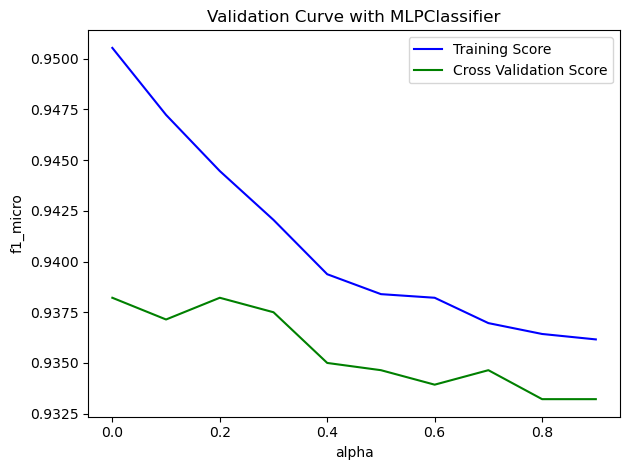

Indices: [2 0 3]
Values: [0.93821429 0.93821429 0.9375    ]


In [59]:
f, train_scores, valid_scores = get_validation_curve(MLPClassifier(random_state=_random_state, hidden_layer_sizes=(110,)), X_train, y_train, "alpha", 0.0001, 1.0, 0.1, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

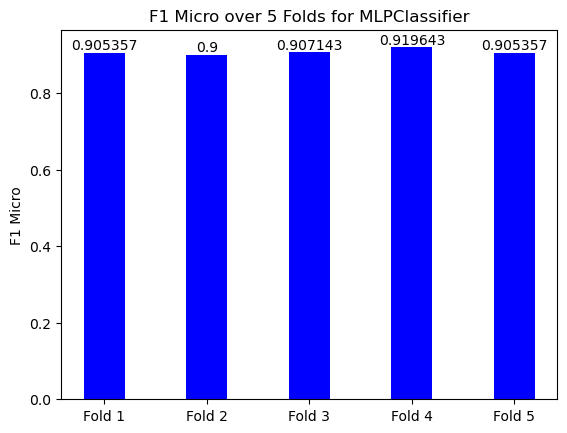

0.9075


In [61]:
mlp = MLPClassifier(random_state=_random_state, hidden_layer_sizes=(110,), solver='lbfgs', max_iter=600)

scores = cross_val_score(mlp, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "MLPClassifier"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for MLPClassifier')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

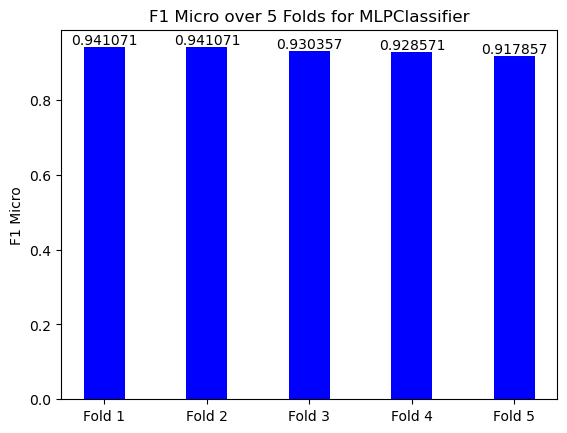

0.9317857142857143


In [62]:
mlp = MLPClassifier(random_state=_random_state, hidden_layer_sizes=(110,), solver='sgd', max_iter=600)

scores = cross_val_score(mlp, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "MLPClassifier"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for MLPClassifier')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\sit

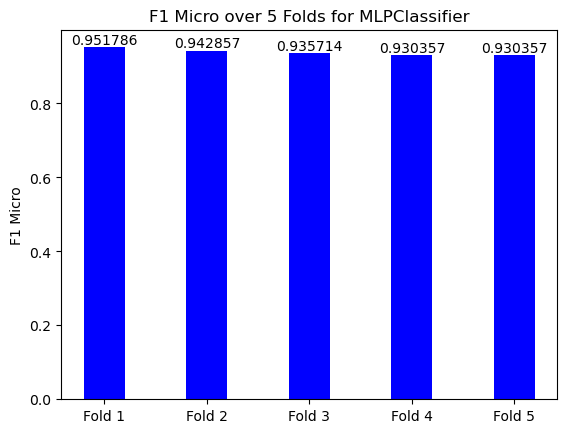

0.9382142857142857


In [76]:
mlp = MLPClassifier(random_state=_random_state, hidden_layer_sizes=(110,))

scores = cross_val_score(mlp, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "MLPClassifier"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for MLPClassifier')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\sit

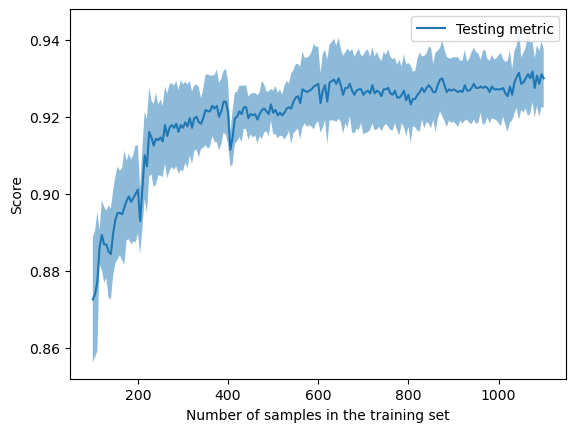

In [77]:
LearningCurveDisplay.from_estimator(
   MLPClassifier(random_state=_random_state, hidden_layer_sizes=(110,)), X_train, y_train, train_sizes=np.arange(500, 2200, 50), cv=5, scoring='f1_micro')

c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\funkj\anaconda3\envs\ML\lib\sit

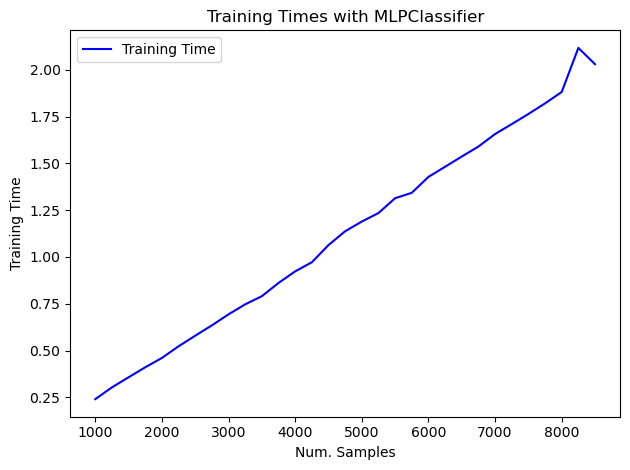

In [78]:
get_training_time(MLPClassifier(random_state=_random_state, hidden_layer_sizes=(110,)), X_train, y_train)

In [79]:
mlp = MLPClassifier(random_state=_random_state, hidden_layer_sizes=(110,))

mlp = mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

accuracy, f1 = model_evaluation(y_test, y_pred)
print('Accuracy: ', accuracy)
print('F1 Micro: ', f1)

Accuracy:  0.9357142857142857
F1 Micro:  0.9357142857142857


c:\Users\funkj\anaconda3\envs\ML\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of iterations:  200
Number of training samples seen 560000
Number of features seen:  16
Best Loss:  0.141234134538771


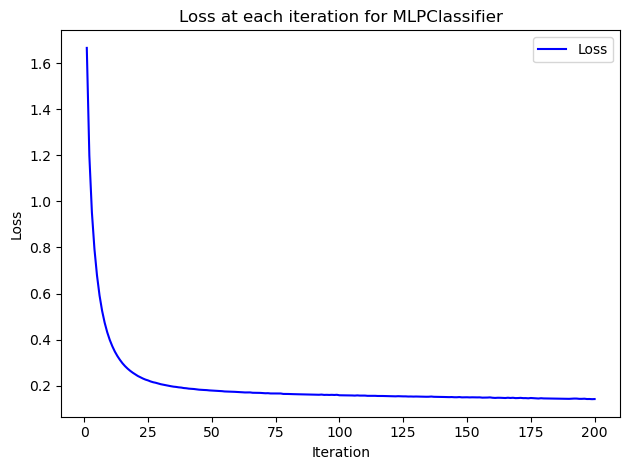

In [80]:
loss = mlp.loss_curve_
param_range = np.arange(1, len(loss)+1, 1)

fig = plt.figure()
plt.plot(param_range, loss,
    label = "Loss", color = 'b')

# Creating the plot
plt.title(f"Loss at each iteration for {mlp.__class__.__name__}")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.tight_layout()
plt.legend(loc = 'best')

print("Number of iterations: ", mlp.n_iter_)
print("Number of training samples seen", mlp.t_)
print("Number of features seen: ", mlp.n_features_in_)
print("Best Loss: ", mlp.best_loss_)

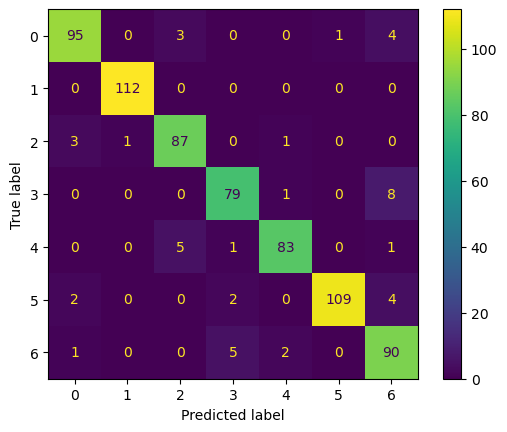

In [81]:
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()

## SVM

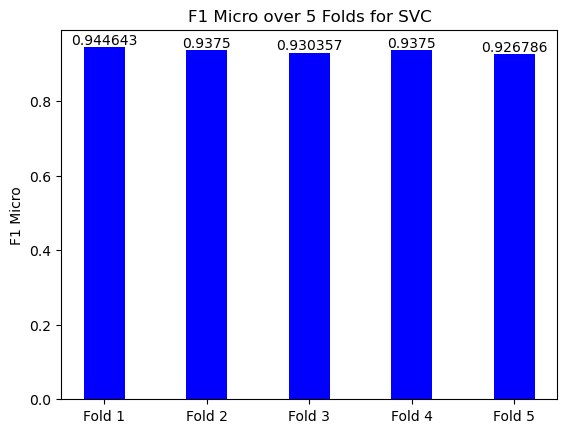

0.9353571428571428


In [82]:
svc = SVC(random_state=_random_state) # rbf kernel

scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "SVC"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for SVC')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

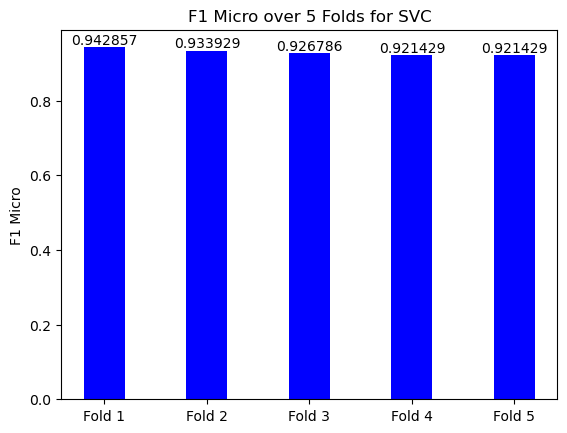

0.9292857142857143


In [83]:
svc = SVC(random_state=_random_state, kernel='linear')

scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "SVC"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for SVC')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

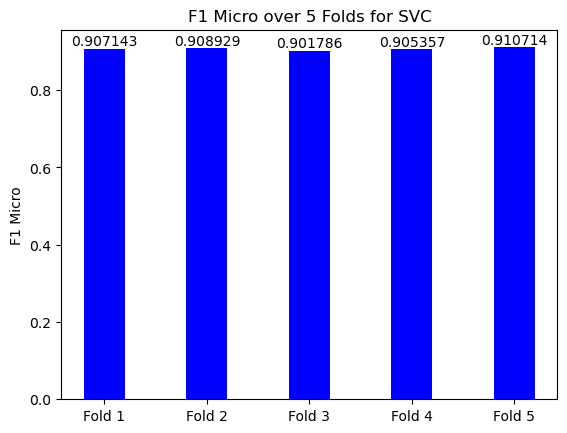

0.9067857142857143


In [84]:
svc = SVC(random_state=_random_state, kernel='poly')

scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "SVC"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for SVC')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

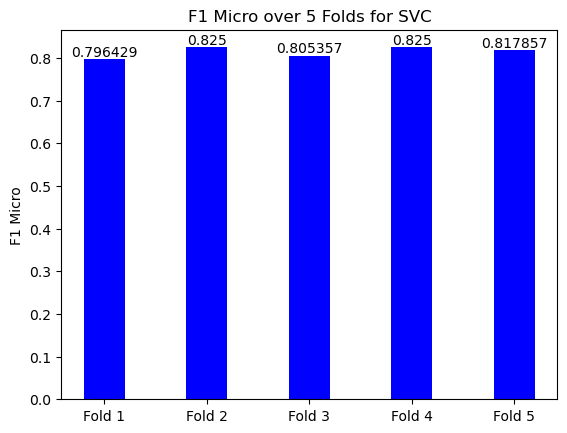

0.8139285714285714


In [85]:
svc = SVC(random_state=_random_state, kernel='sigmoid')

scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "SVC"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for SVC')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

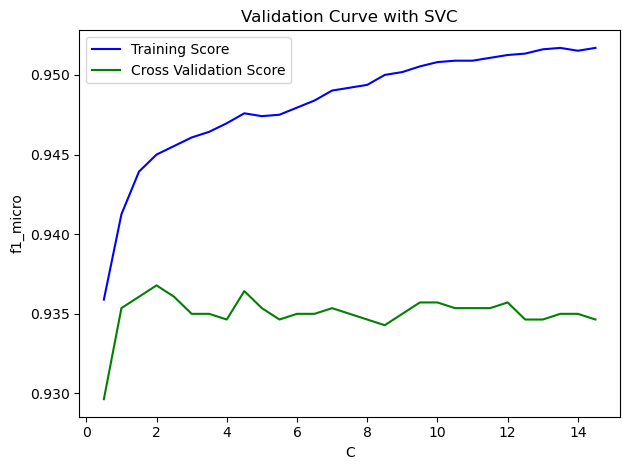

Indices: [0 4 9]
Values: [       nan 0.93678571 0.93642857]


In [87]:
f, train_scores, valid_scores = get_validation_curve(SVC(random_state=_random_state), X_train, y_train, "C", 0, 15, 0.5, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

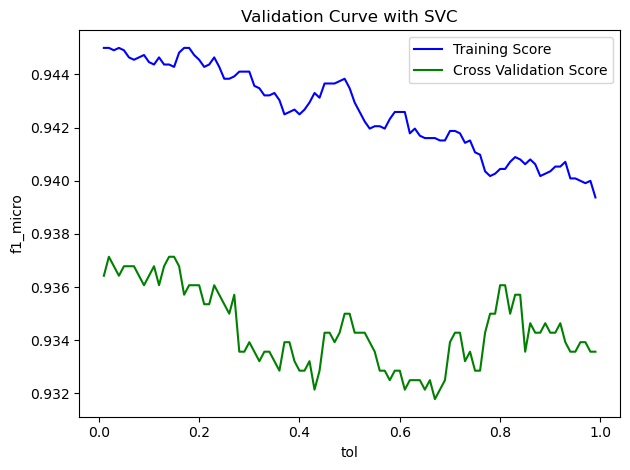

Indices: [ 0  2 15]
Values: [       nan 0.93714286 0.93714286]


In [89]:
f, train_scores, valid_scores = get_validation_curve(SVC(random_state=_random_state, C=2.0), X_train, y_train, "tol", 0, 1, 0.01, 'f1_micro')
plt.show()
x = np.argsort(valid_scores)[::-1][:3]
print("Indices:",x)

# Getting N maximum values
print("Values:",valid_scores[x])

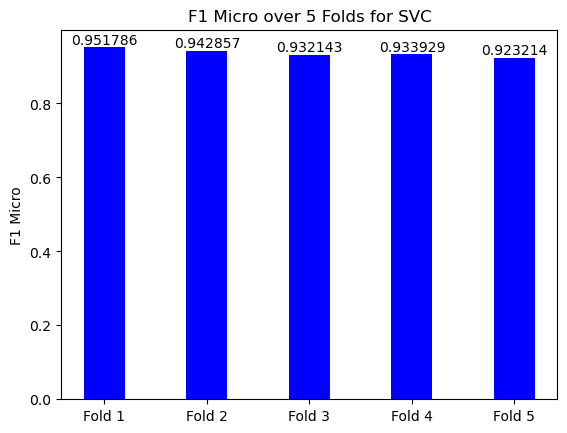

0.9367857142857143


In [91]:
svc = SVC(random_state=_random_state, C=2.0)

scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "SVC"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for SVC')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

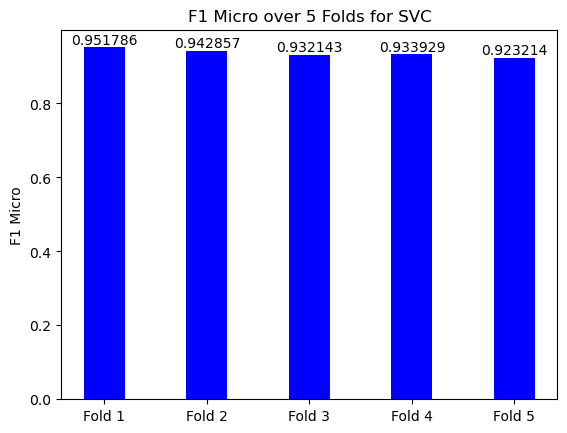

0.9367857142857143


In [92]:
# shrinking = True has no effect

svc = SVC(random_state=_random_state, C=2.0, shrinking=True)

scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "SVC"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for SVC')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

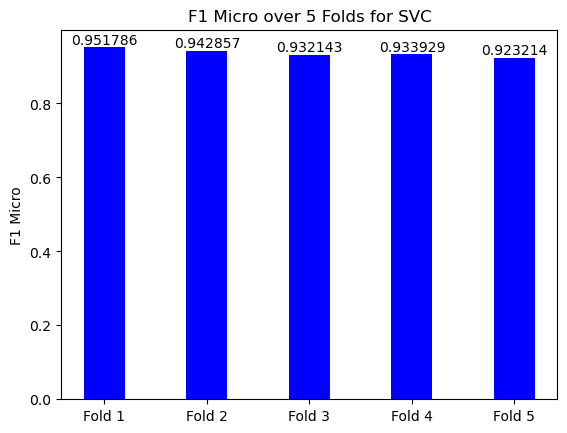

0.9367857142857143


In [93]:
svc = SVC(random_state=_random_state, C=2.0, decision_function_shape='ovo')

scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "SVC"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for SVC')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

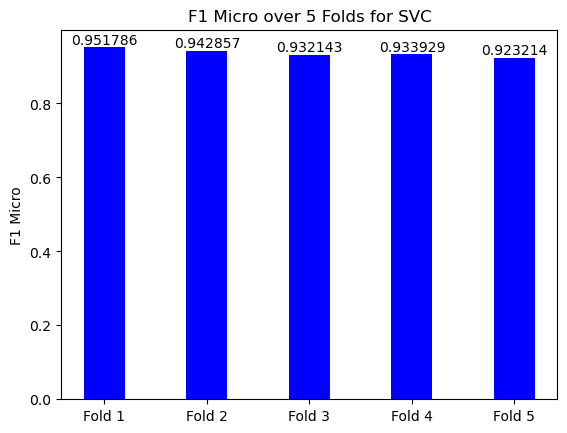

0.9367857142857143


In [94]:
svc = SVC(random_state=_random_state, C=2.0, probability=True)

scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='f1_micro')

model_name = "SVC"
labels = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']

fig, ax = plt.subplots()
ind = np.arange(len(scores))
p1 = ax.bar(labels, scores, 0.4, color='blue', label='Validation Scores')

ax.set_ylabel('F1 Micro')
ax.set_title('F1 Micro over 5 Folds for SVC')
ax.set_xticks(ind, labels=labels)

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1)

plt.show()

print(scores.mean())

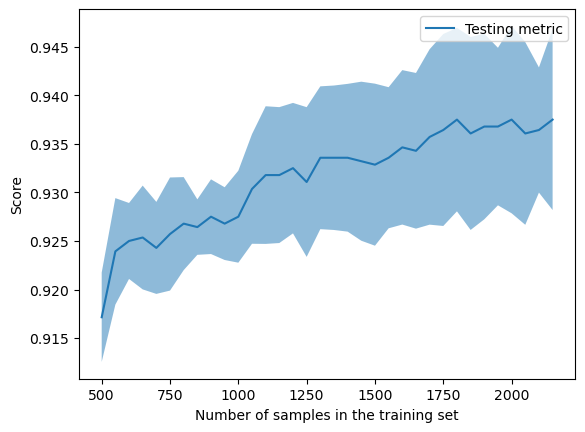

In [95]:
LearningCurveDisplay.from_estimator(
   SVC(random_state=_random_state, C=2.0), X_train, y_train, train_sizes=np.arange(500, 2200, 50), cv=5, scoring='f1_micro')

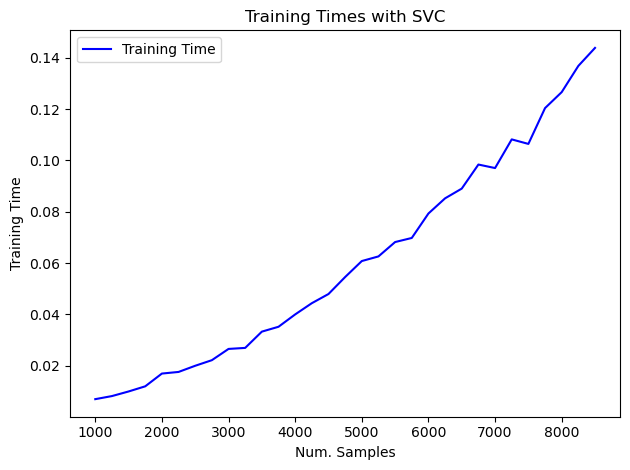

In [96]:
get_training_time(SVC(random_state=_random_state, C=2.0), X_train, y_train)

In [97]:
svc = SVC(random_state=_random_state, C=2.0)

svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

accuracy, f1 = model_evaluation(y_test, y_pred)
print('Accuracy: ', accuracy)
print('F1 Micro: ', f1)

Accuracy:  0.9357142857142857
F1 Micro:  0.9357142857142857


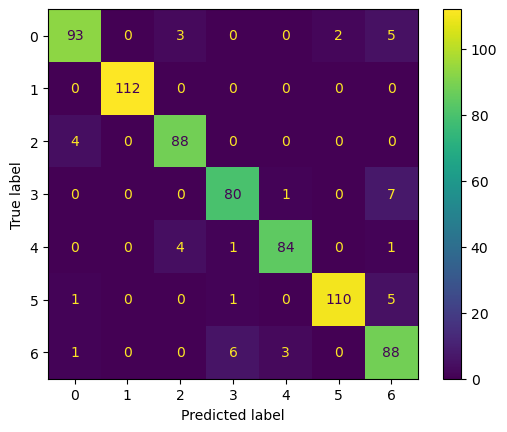

In [98]:
cm = confusion_matrix(y_test, y_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()